In [10]:
import os
import time
import json

import numpy as np
import skimage

import keras
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

from dice import dice_coef, dice_loss
from predict import predict_mask
from visualize import display_slice_from_batch

In [13]:
image_path = "/home/gauthamar11/pyLattice2/src/tensorflow/quickUnet/dataset/sample3/S3P4_488_150mw_560_300mw_10ms_dz200nm_ch1_CAM1_stack0000_560nm_0000000msec_0005288366msecAbs_000x_000y_003z_0000t_decon.tif_ratioCorrected.tif"
model_path = "sep17_largeframe_48_nonzero_standardized_local_more_epochs.h5"
image_size = 96
patch_size = 48
batch_size = 8

In [3]:
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model = load_model(model_path, custom_objects={'dice': dice_loss(), 'dice_coef': dice_coef})

In [14]:
#USE FOR NON-CUBE PREDICTIONS
#Use the overloaded predict_mask method whcih can detect the correct size
start = time.time()
mask = predict_mask(model, image_path, patch_size, offset=np.asarray([0,0,0]))
end = time.time()
print("Time to complete: " + str(end - start))

Image cropped to: 96, 672, 480
Time to complete: 30.430662870407104


In [18]:
prediction_file = (mask*255.0).astype('uint16')
metadata = dict(microscope='joh', shape=prediction_file.shape, dtype=prediction_file.dtype.str)
metadata = json.dumps(metadata)
skimage.external.tifffile.imsave("/home/gauthamar11/pyLattice2/src/tensorflow/quickUnet/dataset/sample3/"+"3prediction.tif", prediction_file, description=metadata)    

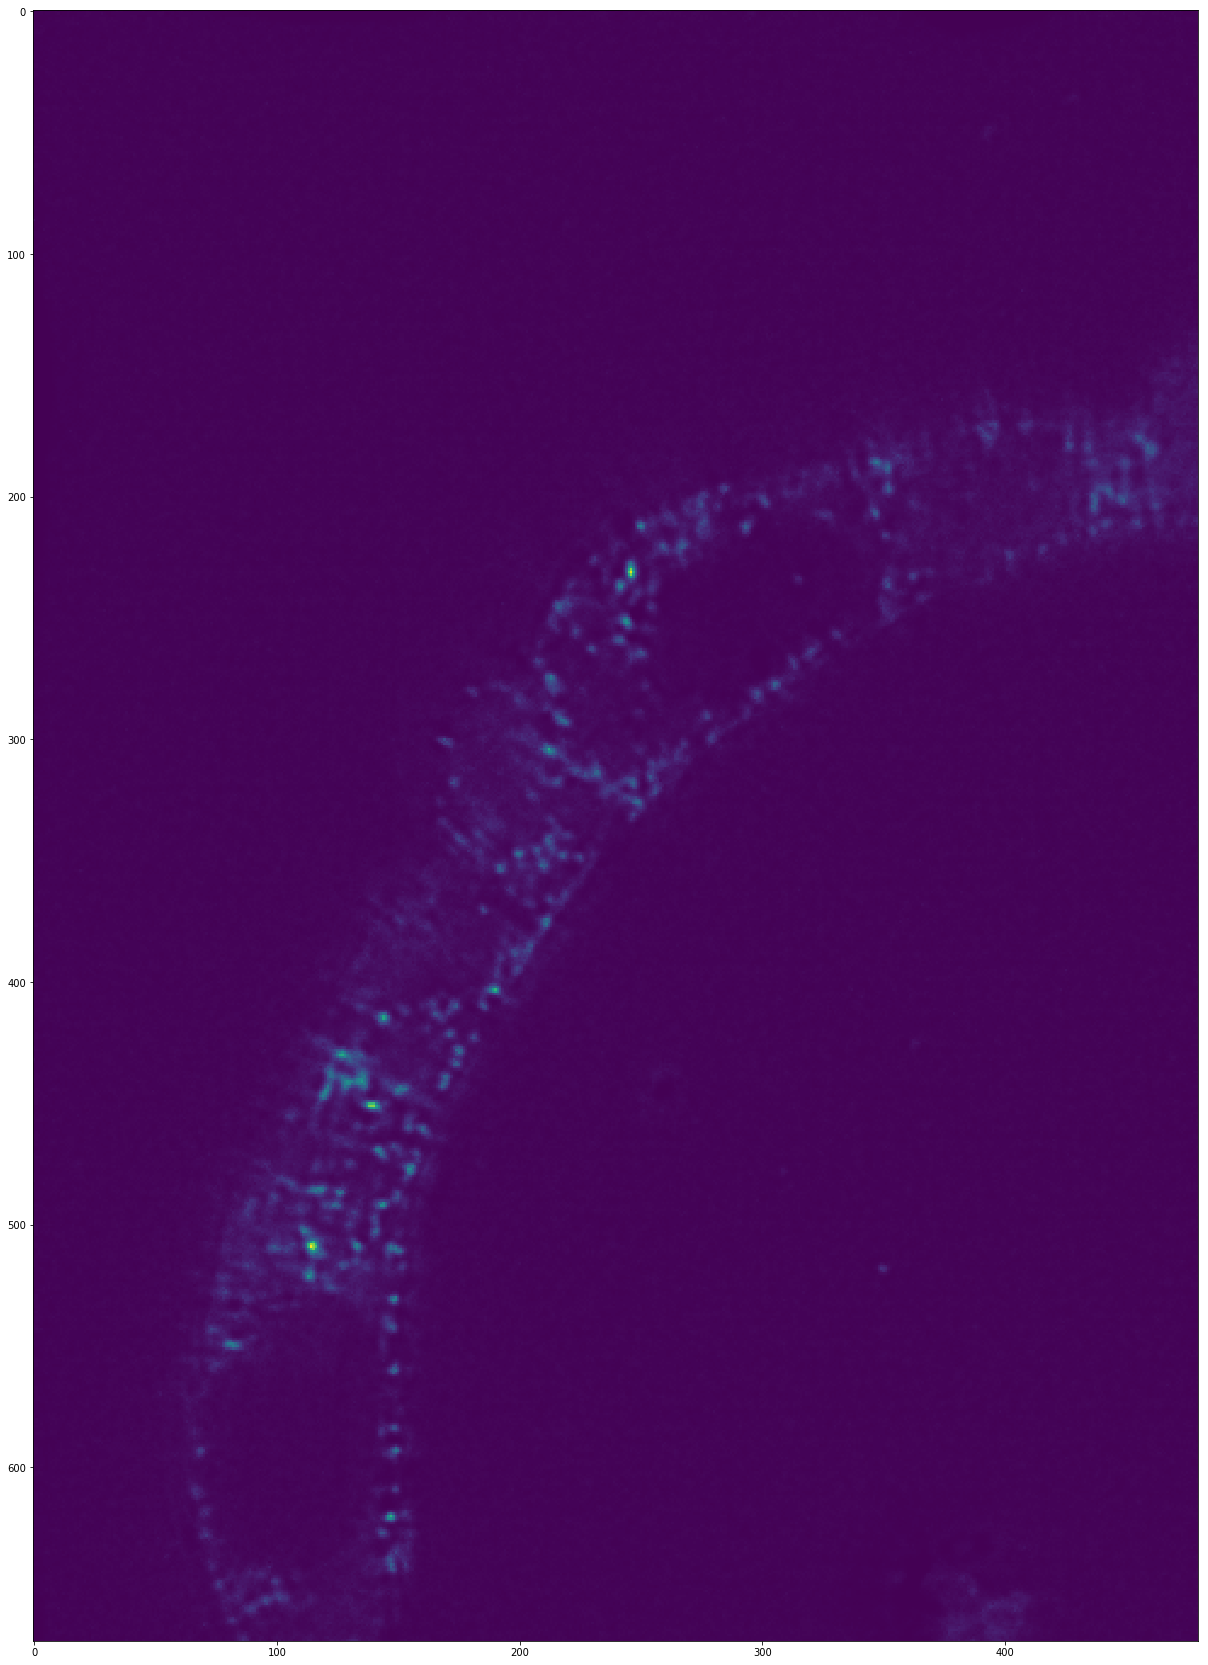

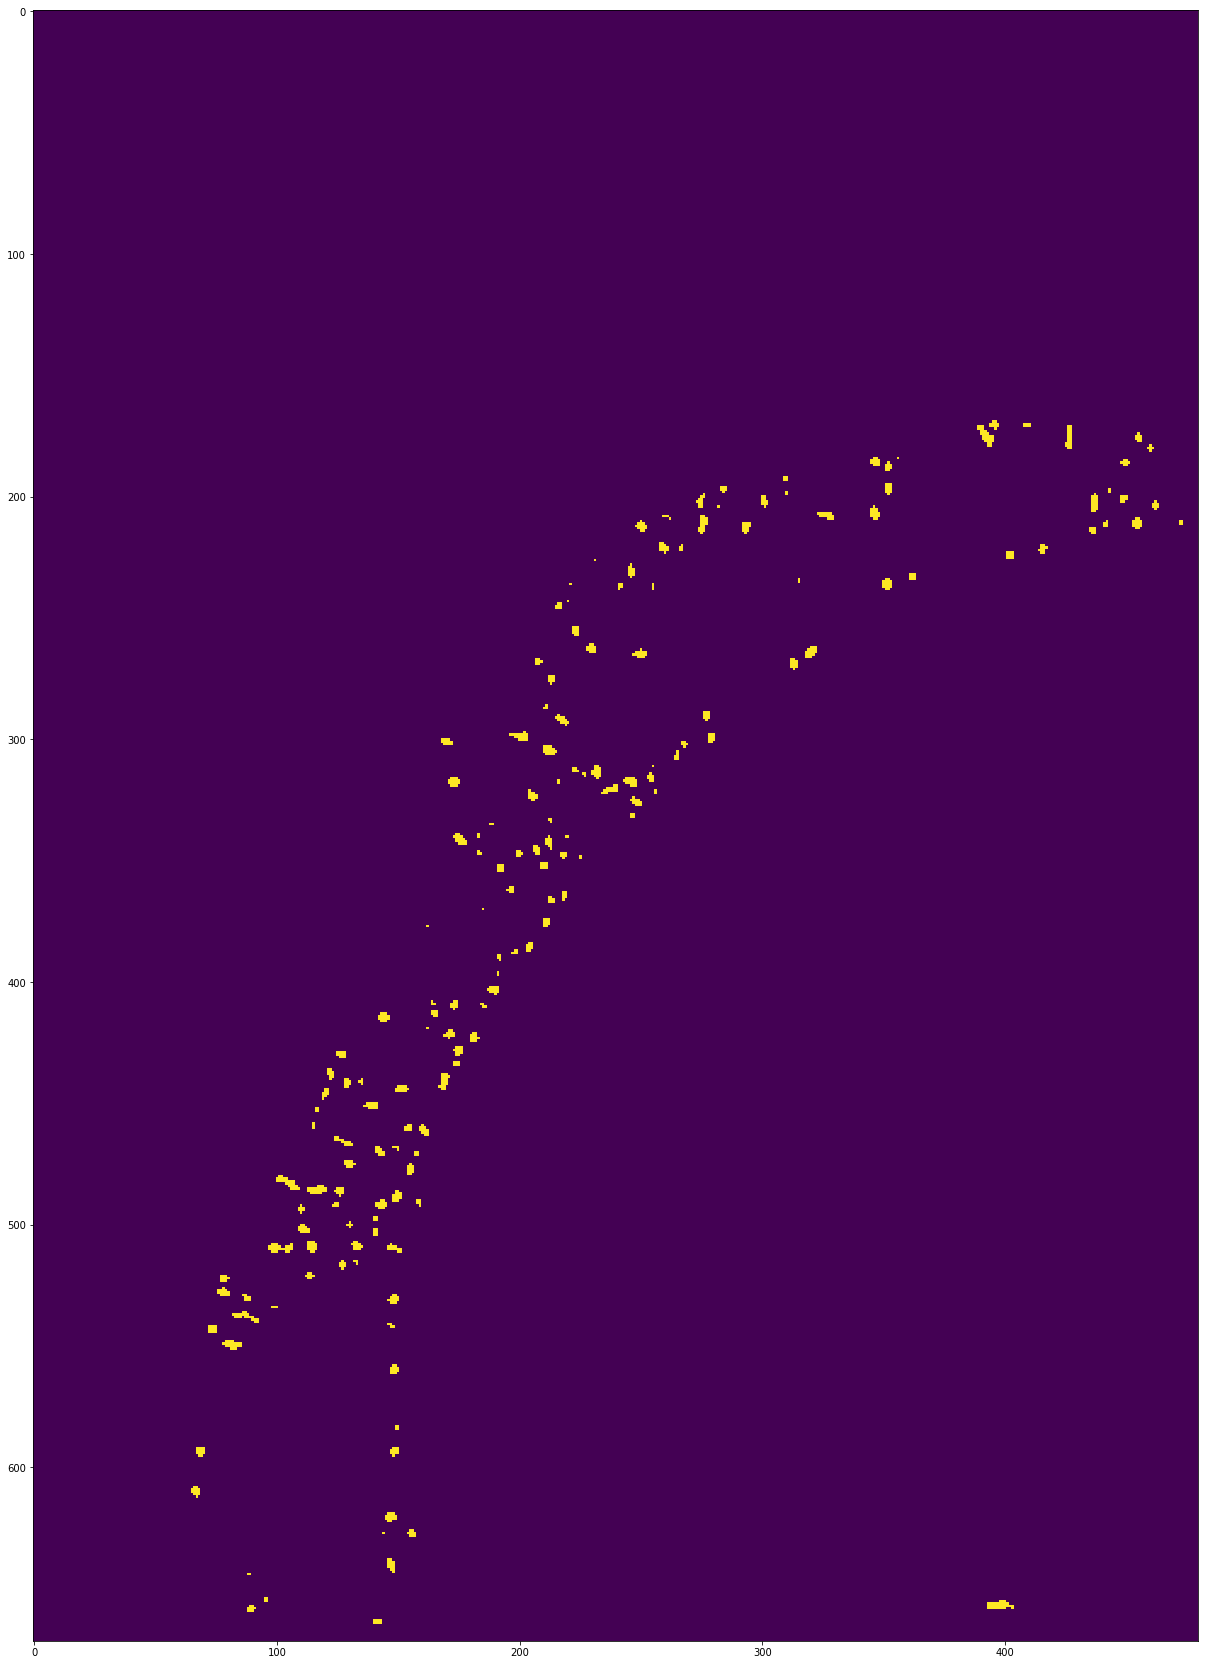

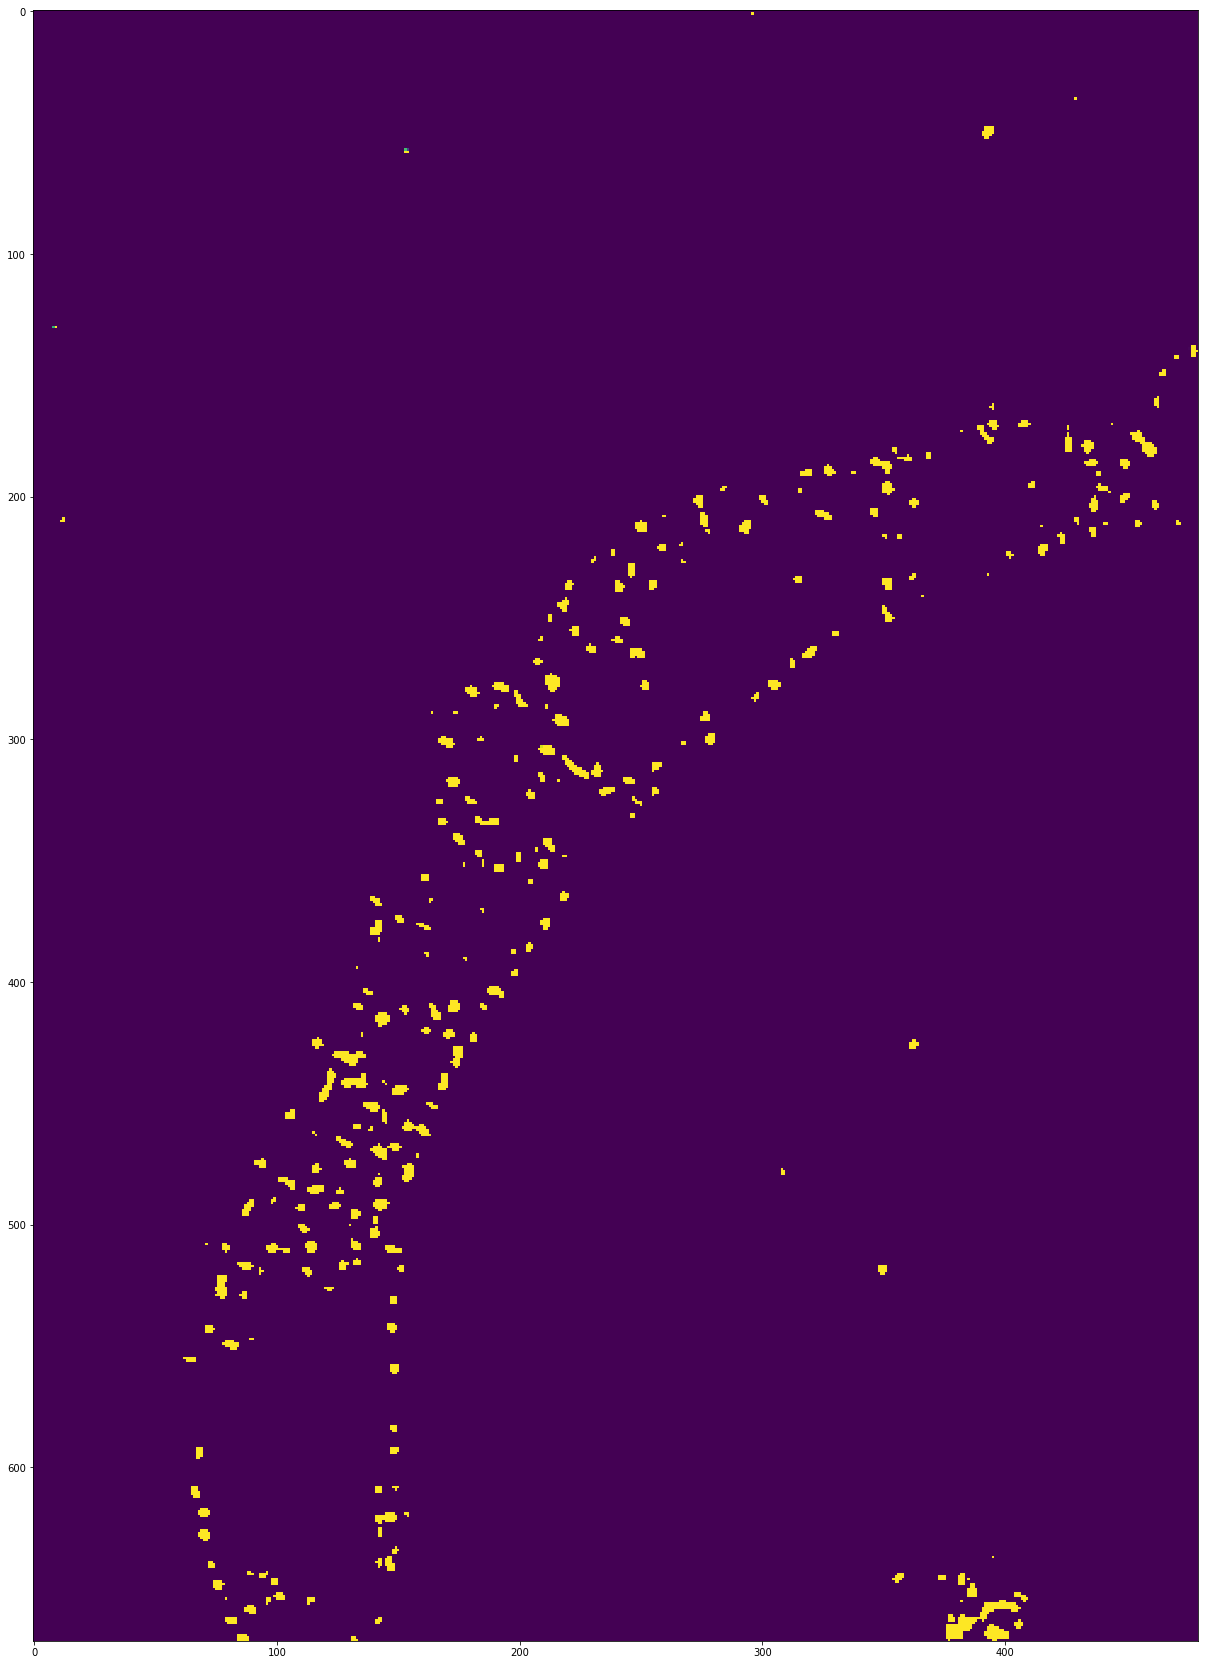

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]

display_slice_from_batch(skimage.external.tifffile.imread(image_path)[:96, :672, :480].reshape(1, 96, 672, 480, 1), z=48)
display_slice_from_batch(skimage.external.tifffile.imread("/home/gauthamar11/pyLattice2/src/tensorflow/quickUnet/dataset/sample7/dmask_01.tif")[:96, :672, :480].reshape(1, 96, 672, 480, 1), z=48)
display_slice_from_batch(mask, z=48)
#With sep17_largeframe_48_nonzero_standardized_local_more_epochs on larger data size, with no offset
#sample7

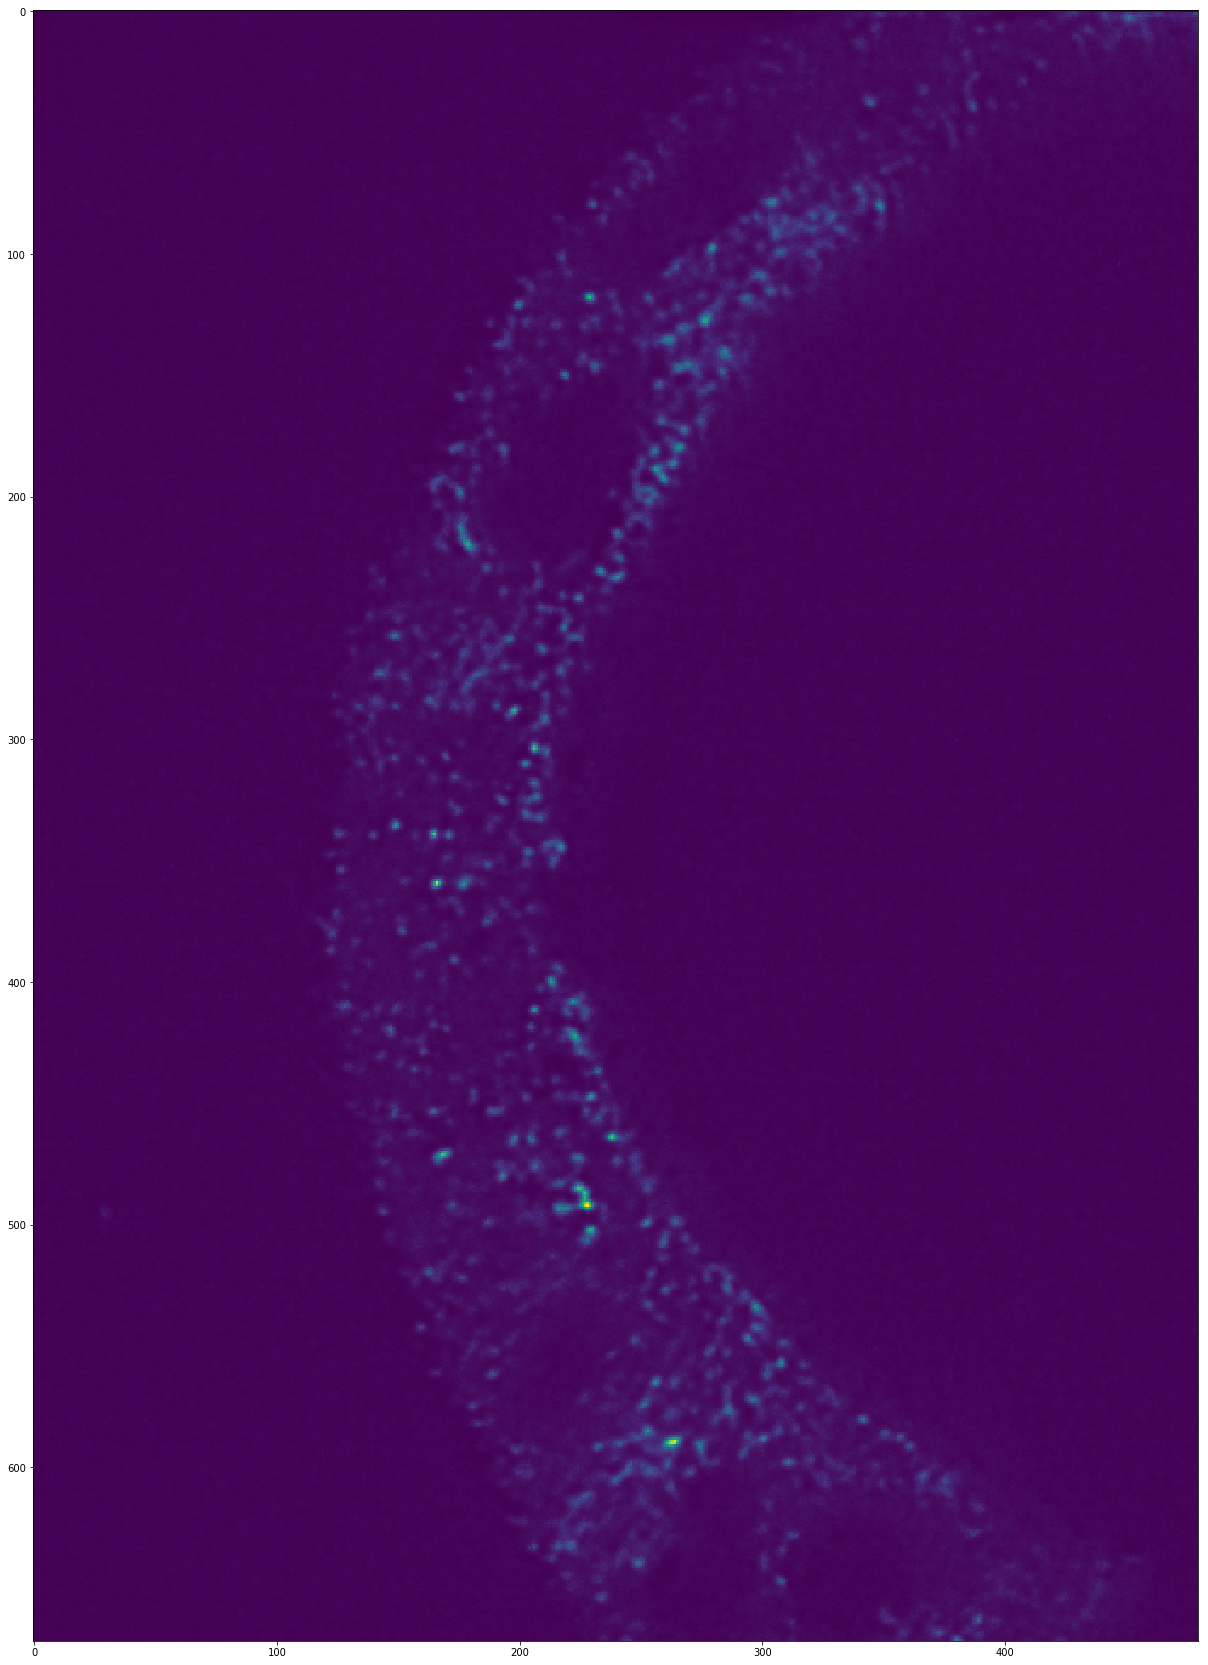

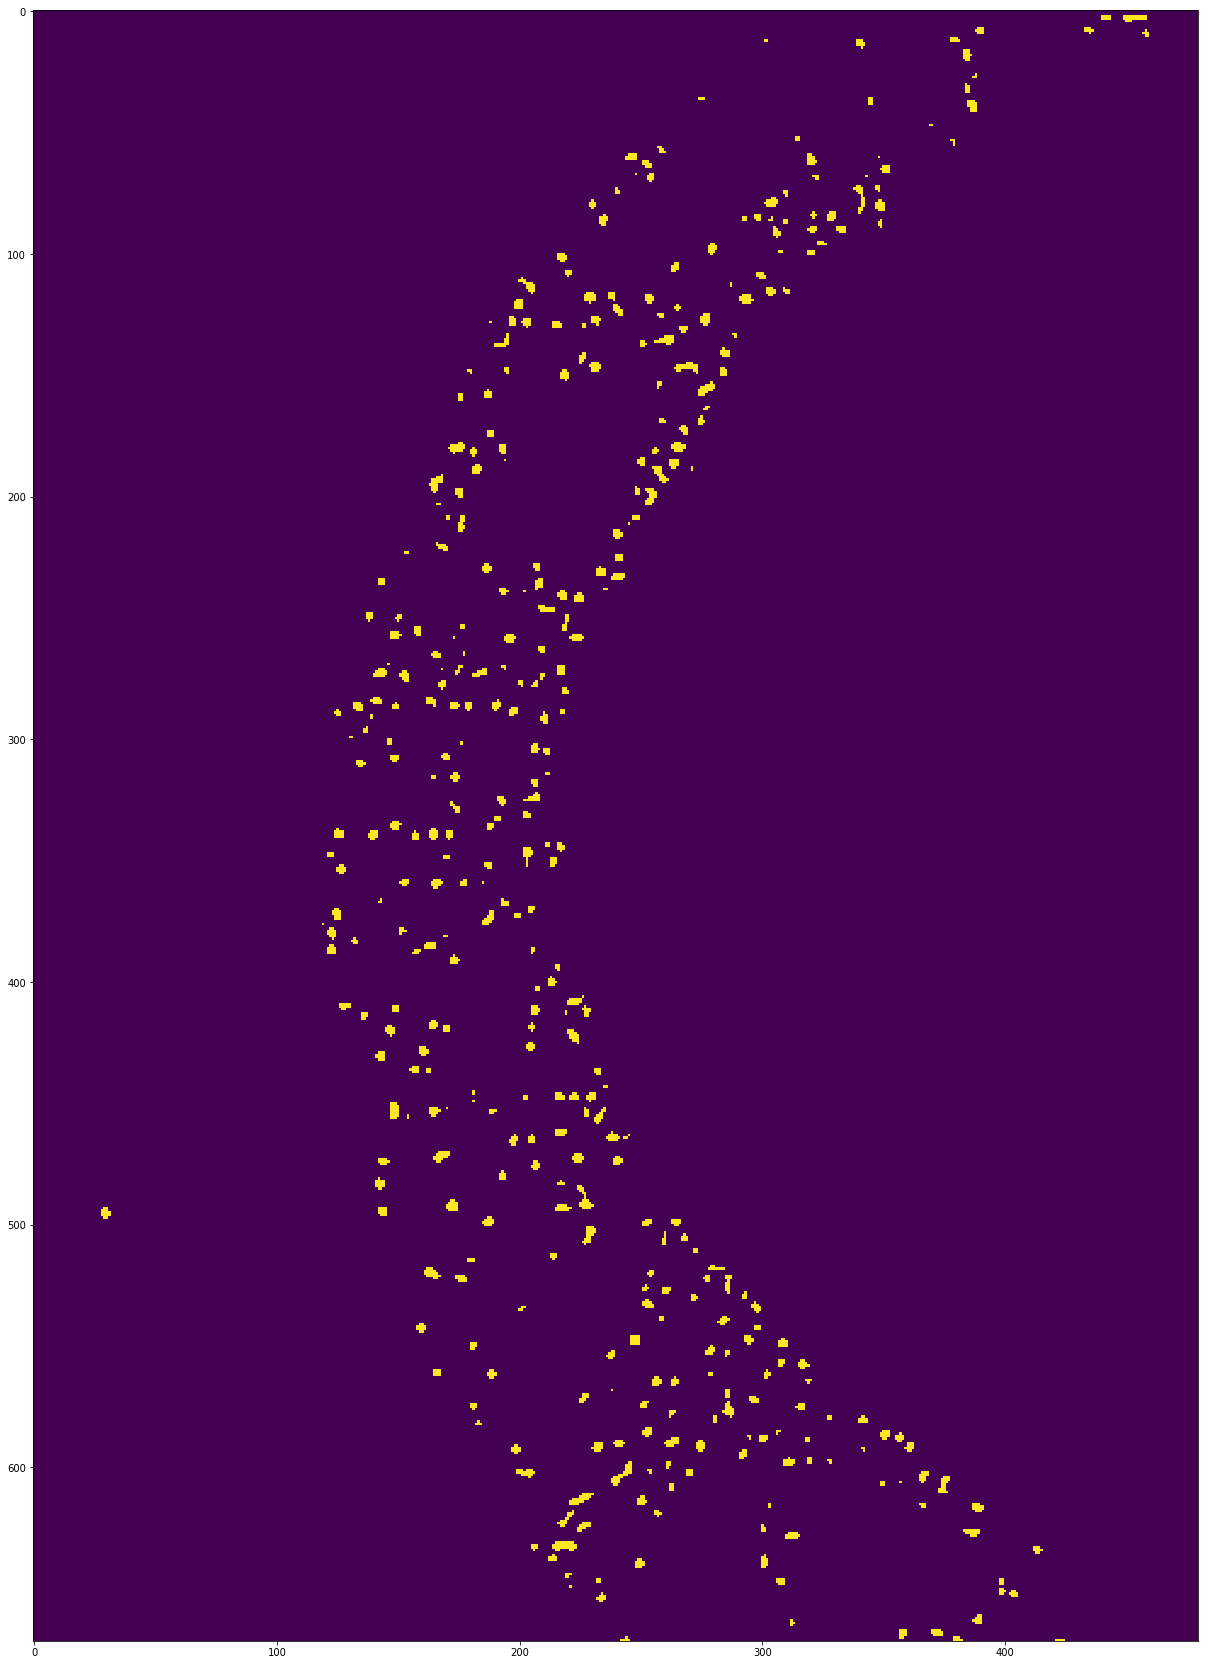

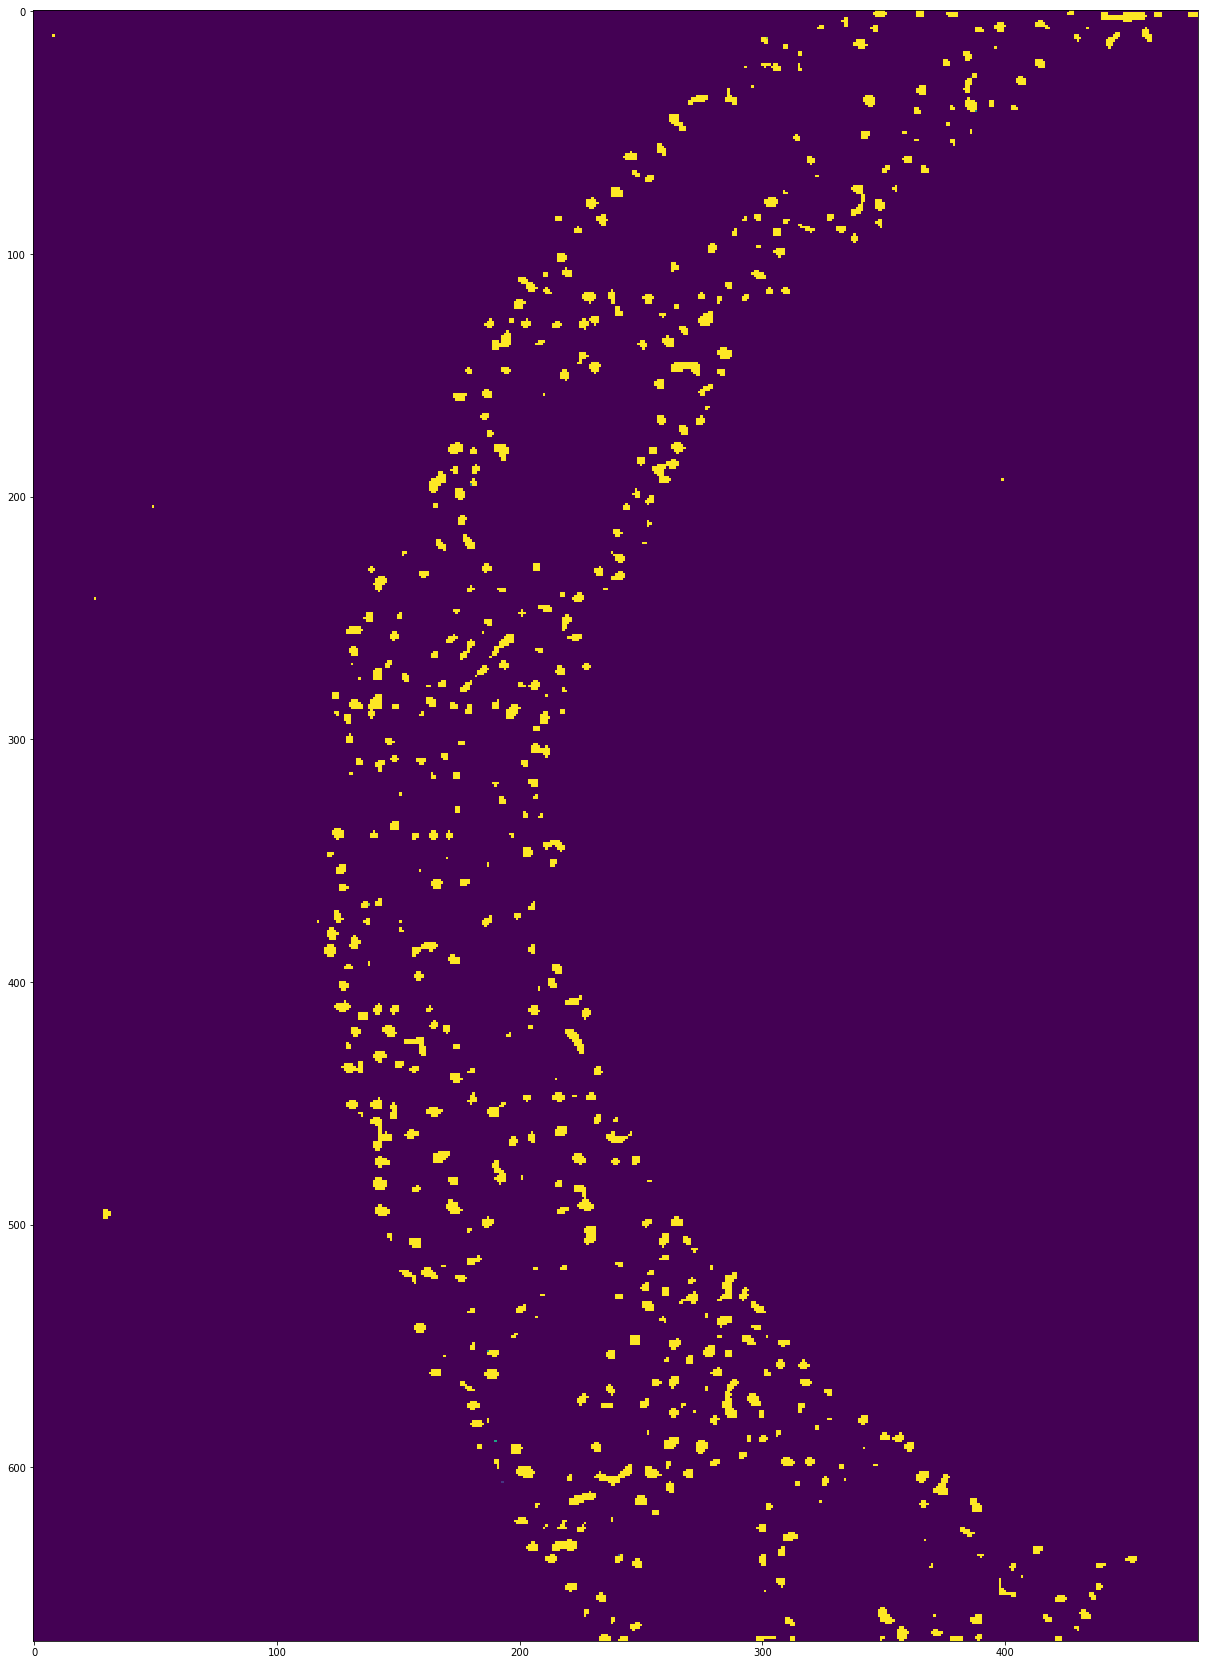

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]

display_slice_from_batch(skimage.external.tifffile.imread(image_path)[:96, :672, :480].reshape(1, 96, 672, 480, 1), z=48)
display_slice_from_batch(skimage.external.tifffile.imread("/home/gauthamar11/pyLattice2/src/tensorflow/quickUnet/dataset/sample5/dmask_001.tif")[:96, :672, :480].reshape(1, 96, 672, 480, 1), z=48)
display_slice_from_batch(mask, z=48)
#With sep17_largeframe_48_nonzero_standardized_local_more_epochs on larger data size, with no offset
#sample5

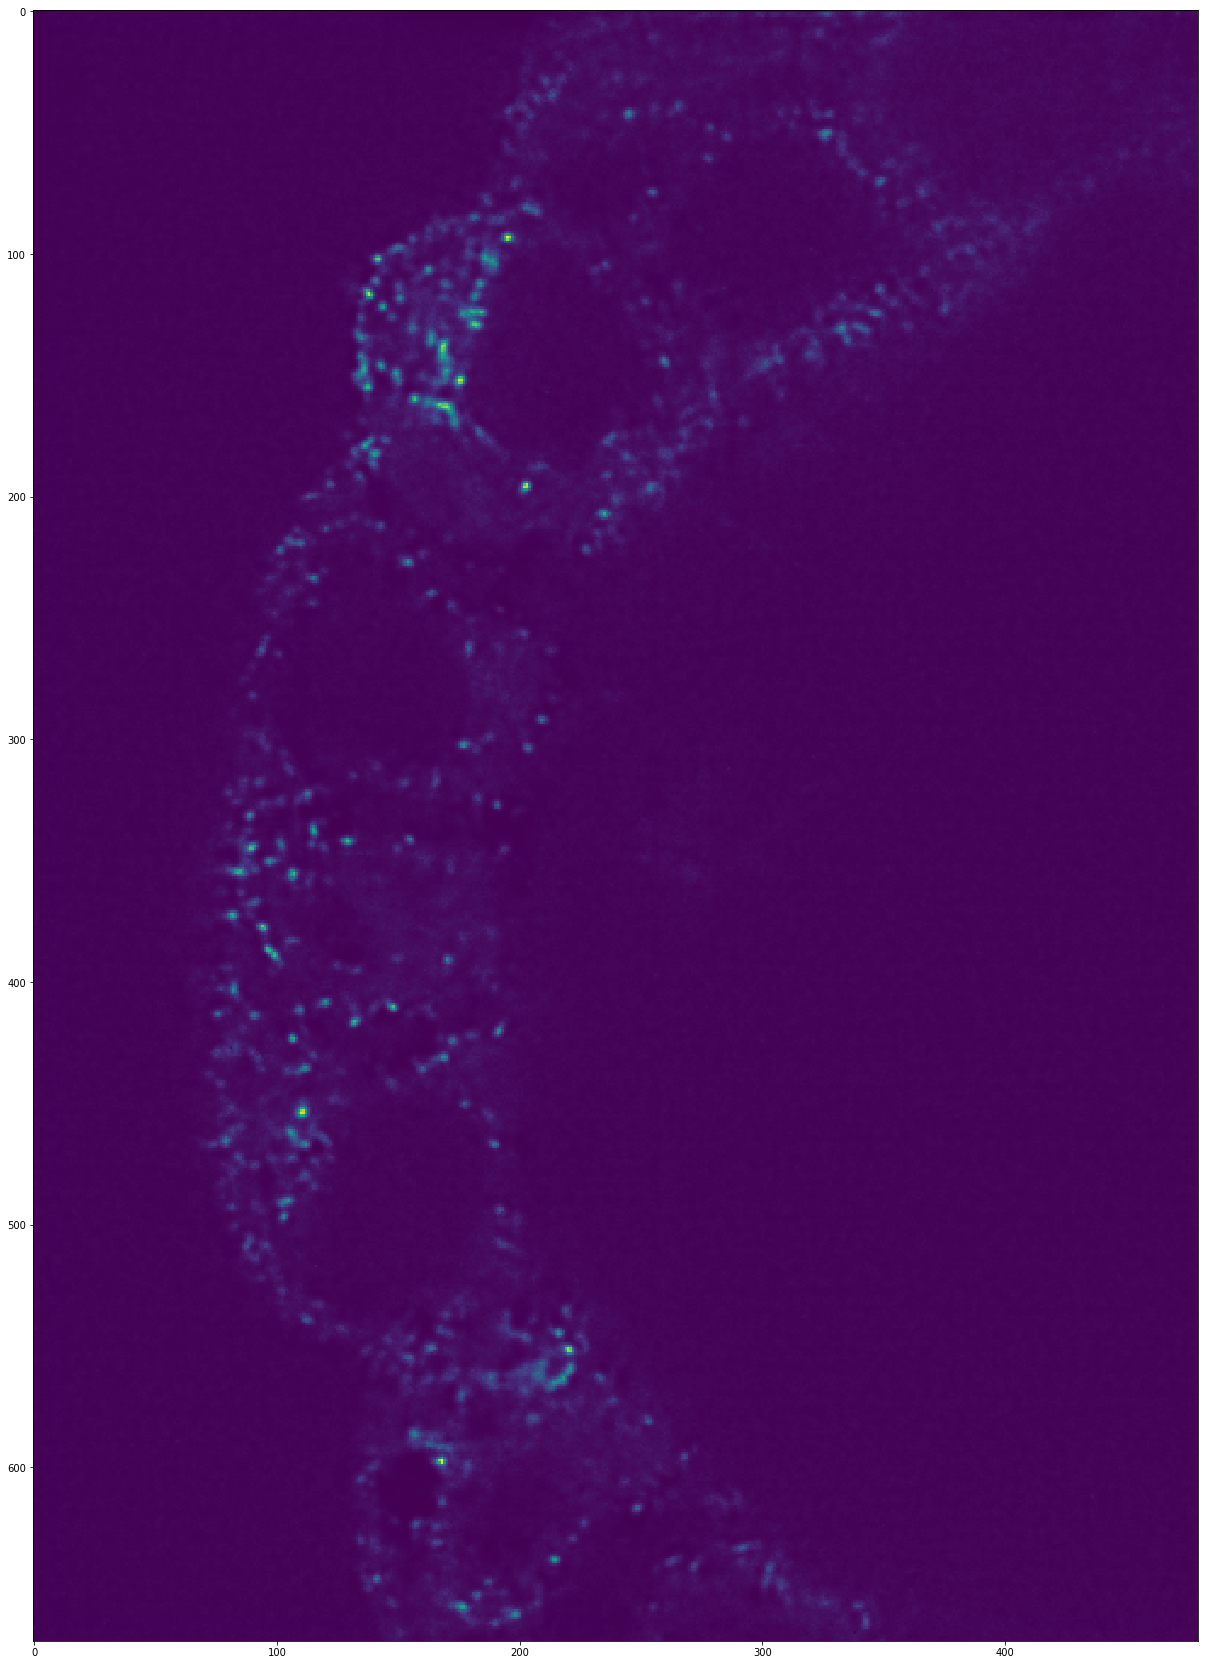

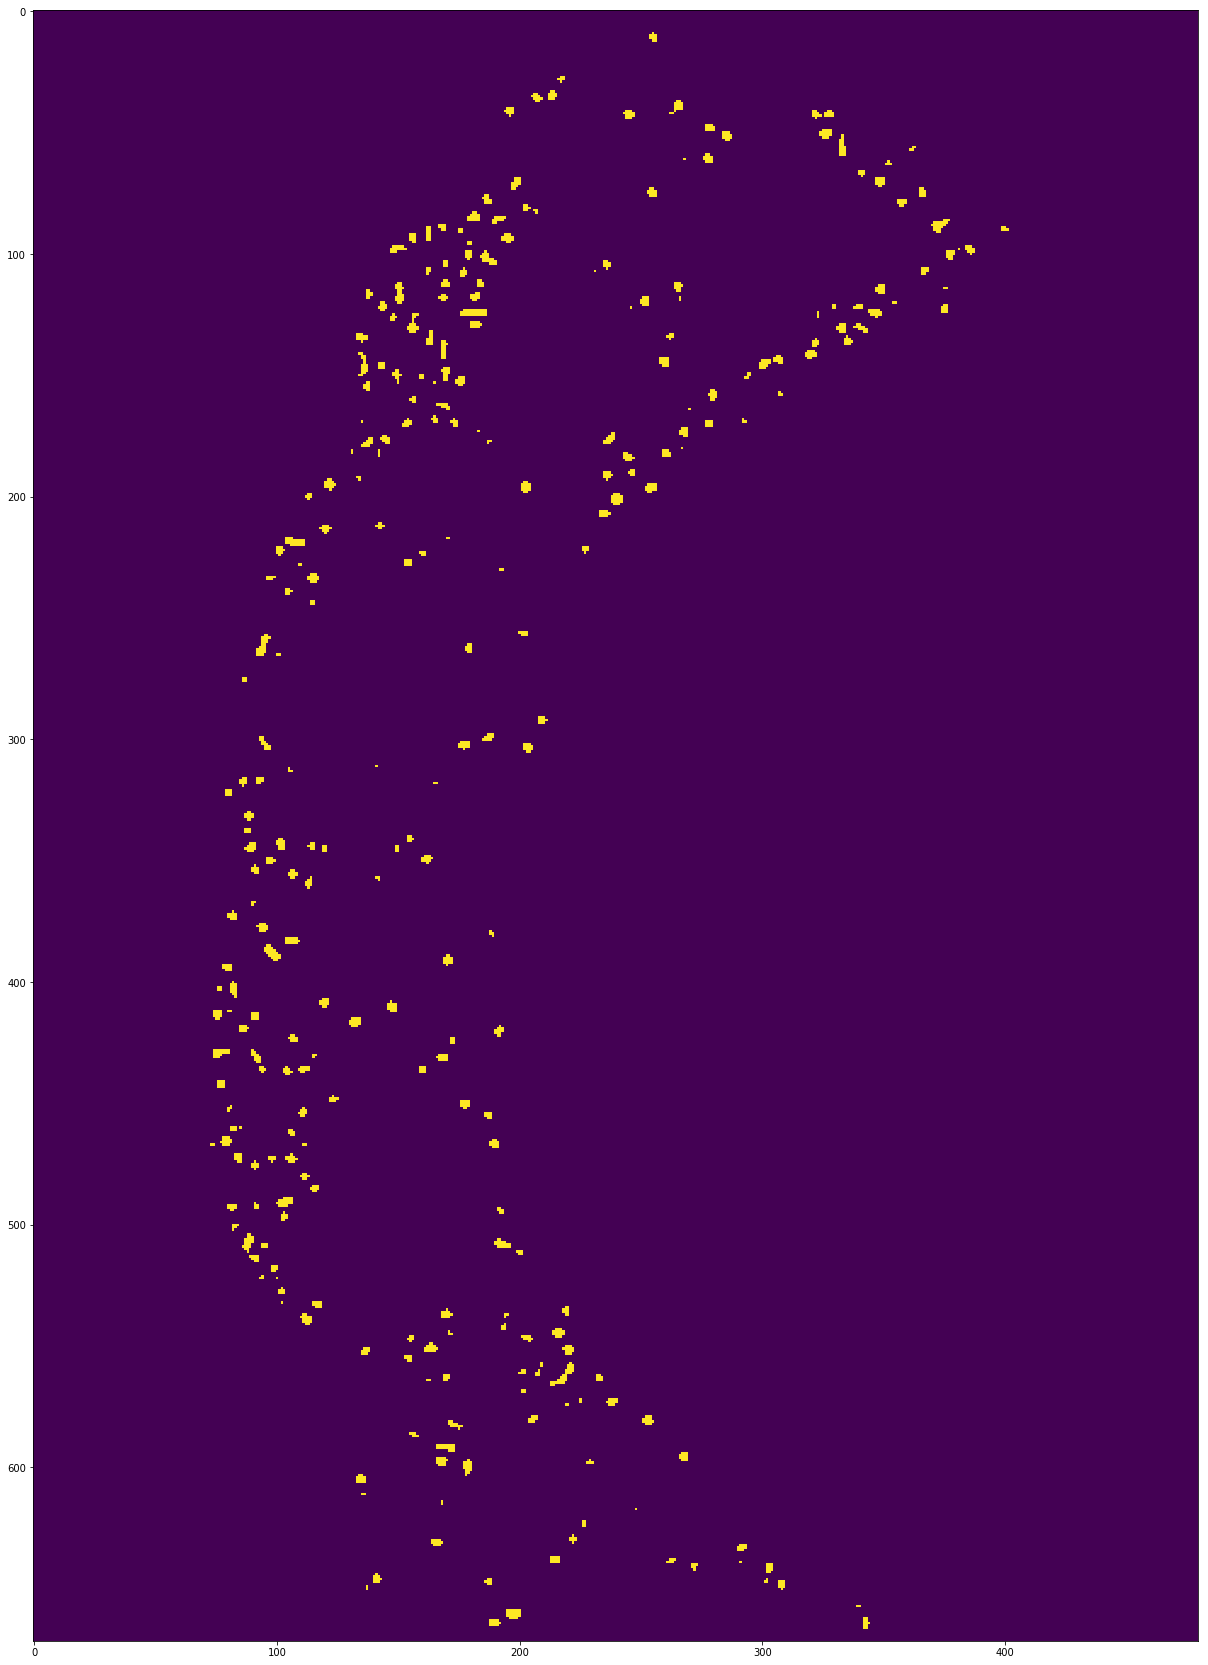

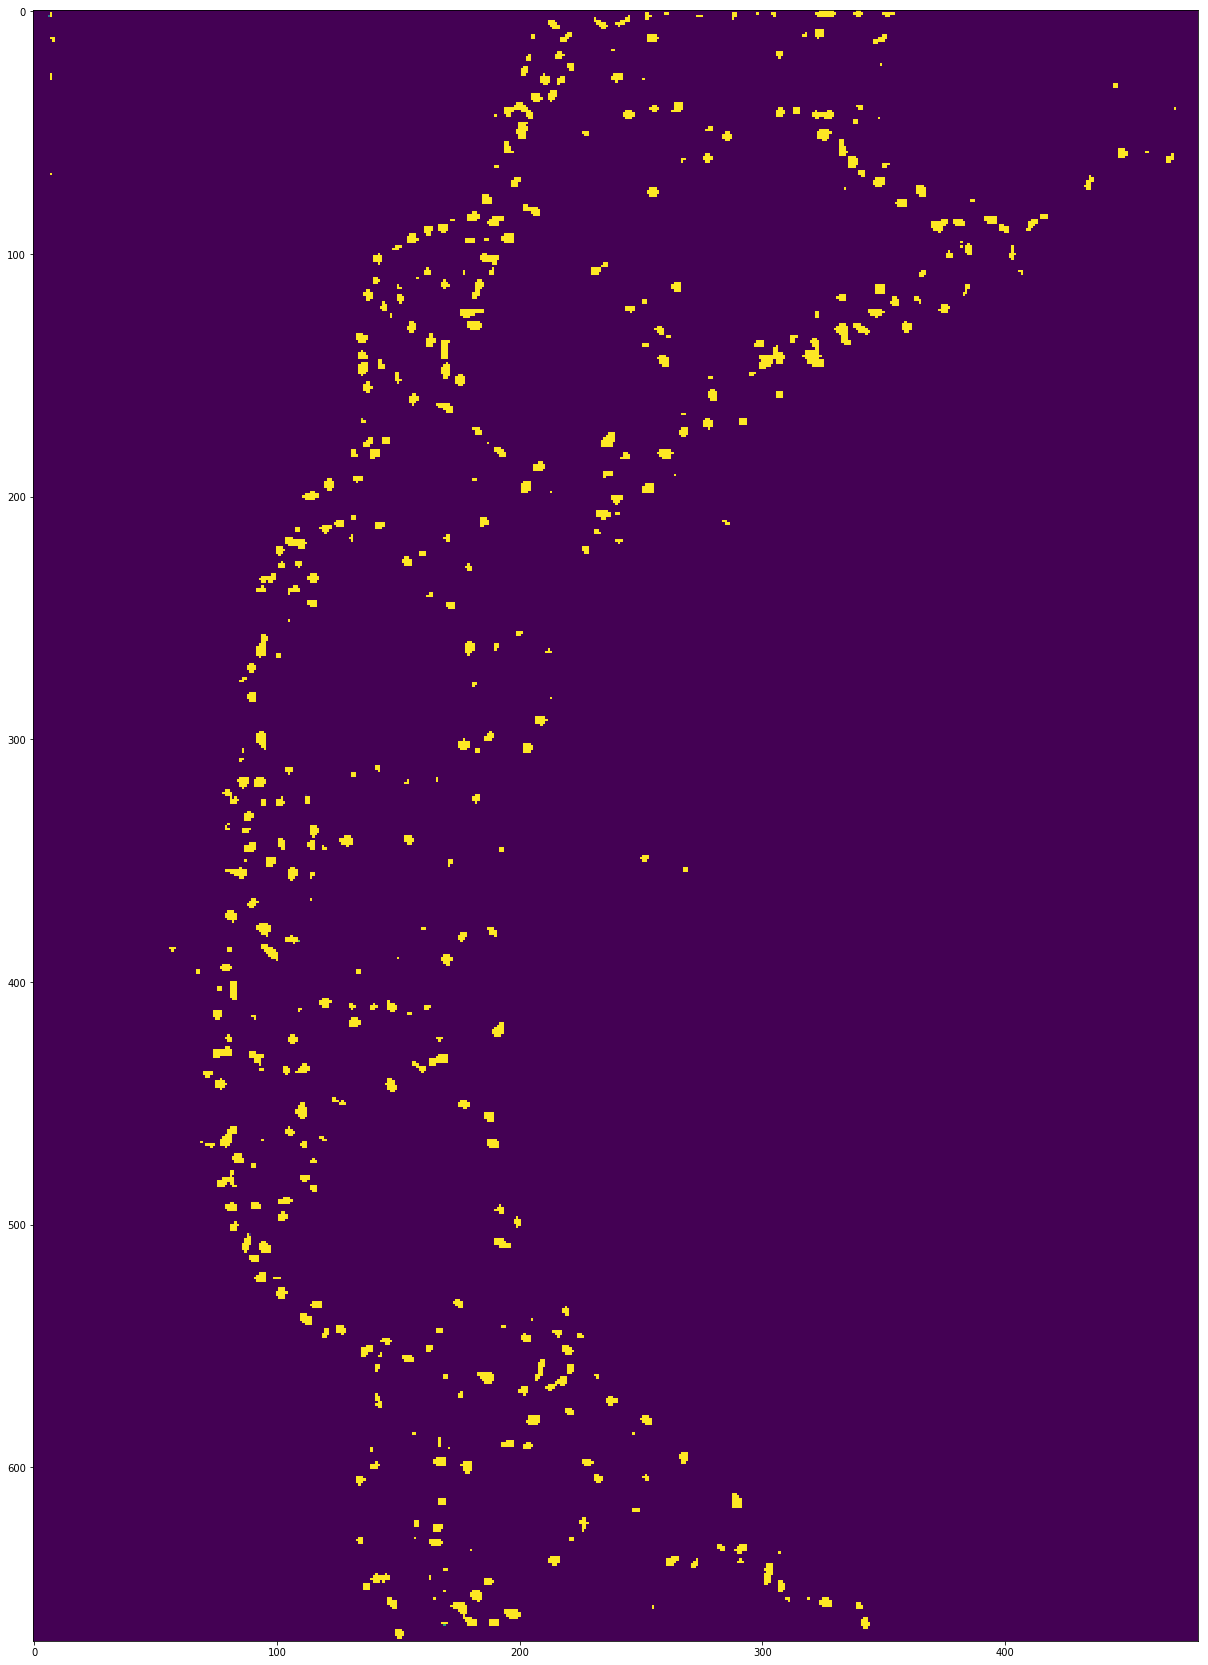

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]

display_slice_from_batch(skimage.external.tifffile.imread(image_path)[:96, :672, :480].reshape(1, 96, 672, 480, 1), z=48)
display_slice_from_batch(skimage.external.tifffile.imread("/home/gauthamar11/pyLattice2/src/tensorflow/quickUnet/dataset/sample3/dmask_01.tif")[:96, :672, :480].reshape(1, 96, 672, 480, 1), z=48)
display_slice_from_batch(mask, z=48)
#With sep17_largeframe_48_nonzero_standardized_local_more_epochs on larger data size, with no offset
#sample3

/usr/local/lib/python3.5/dist-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


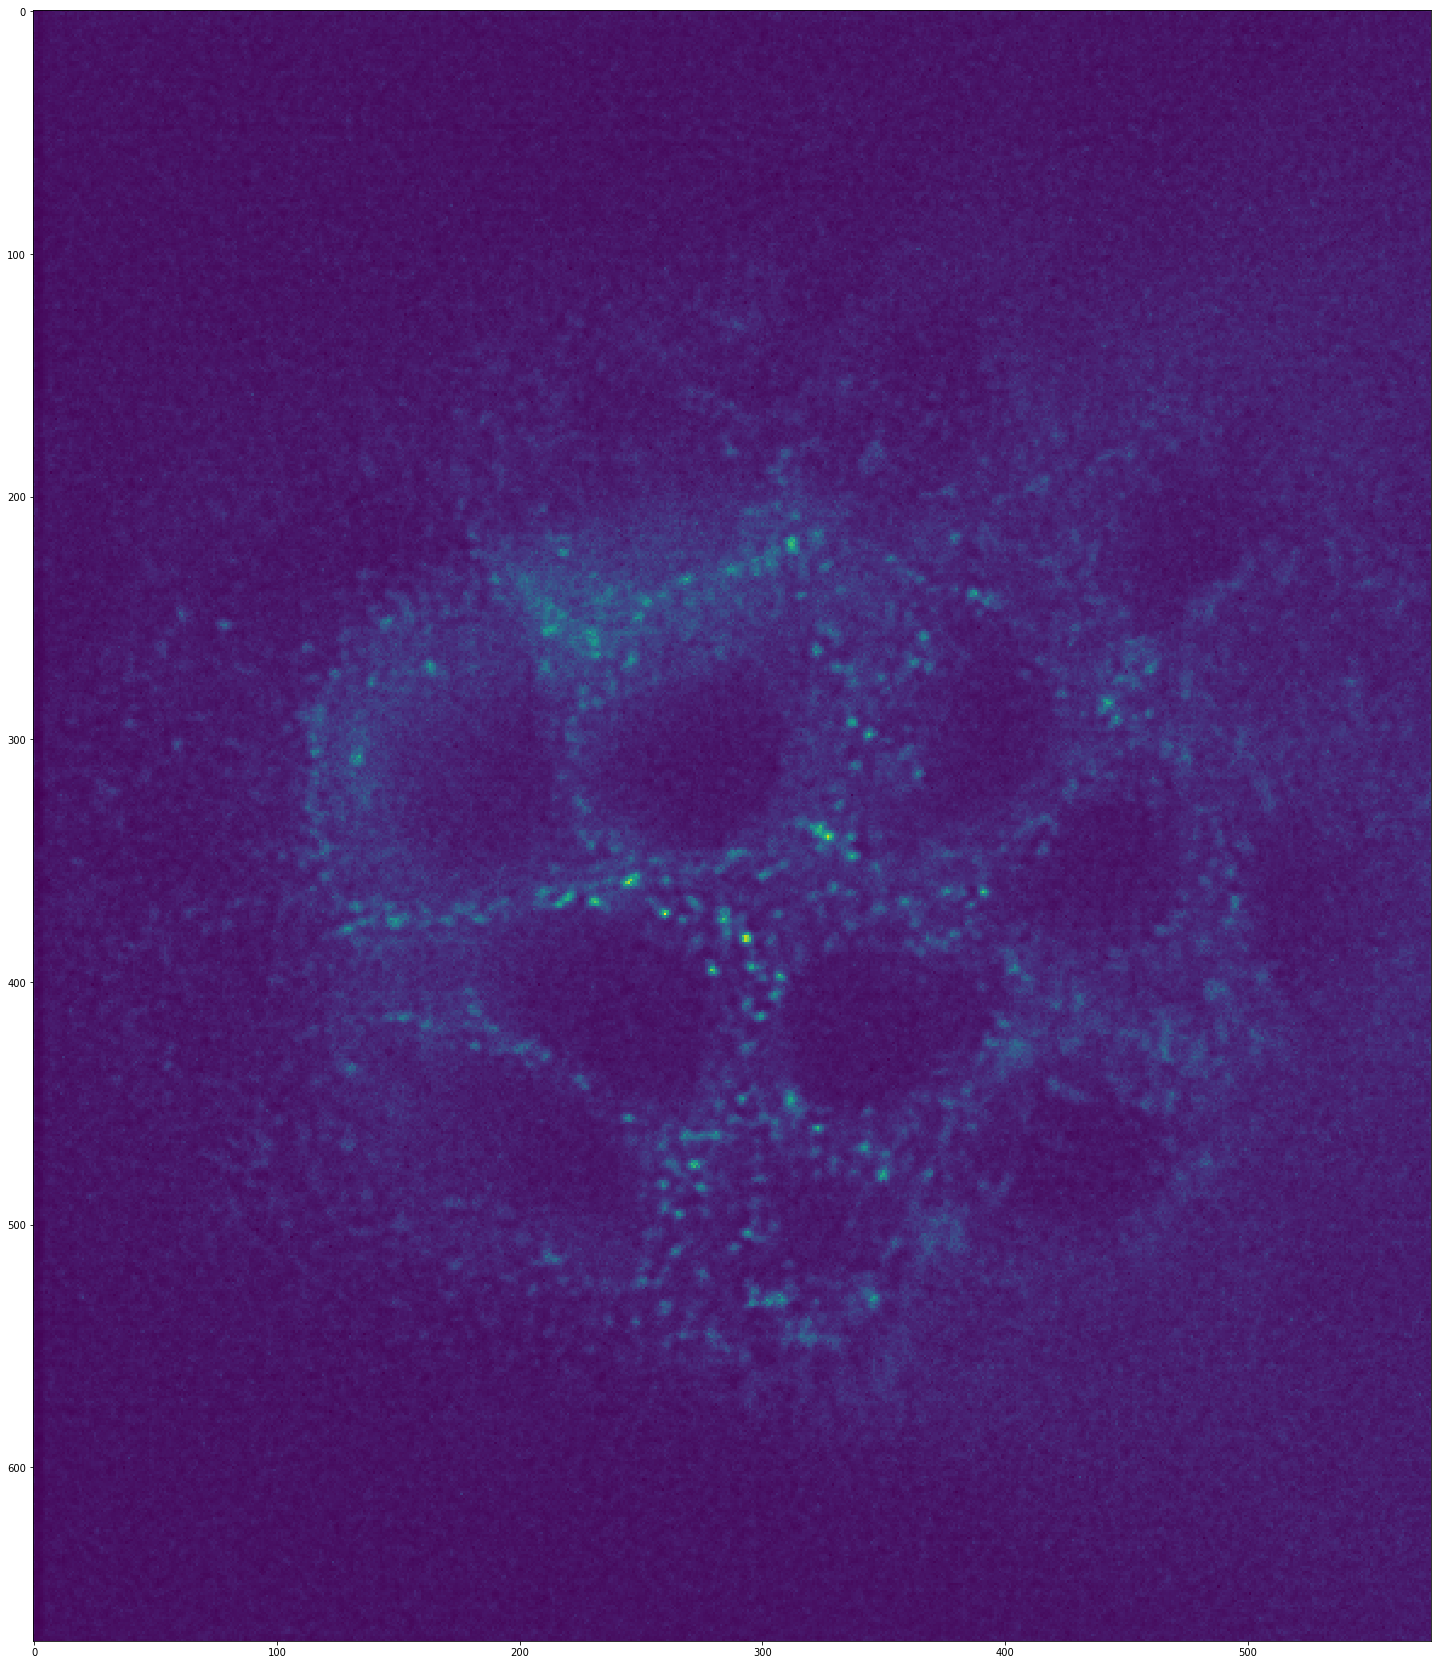

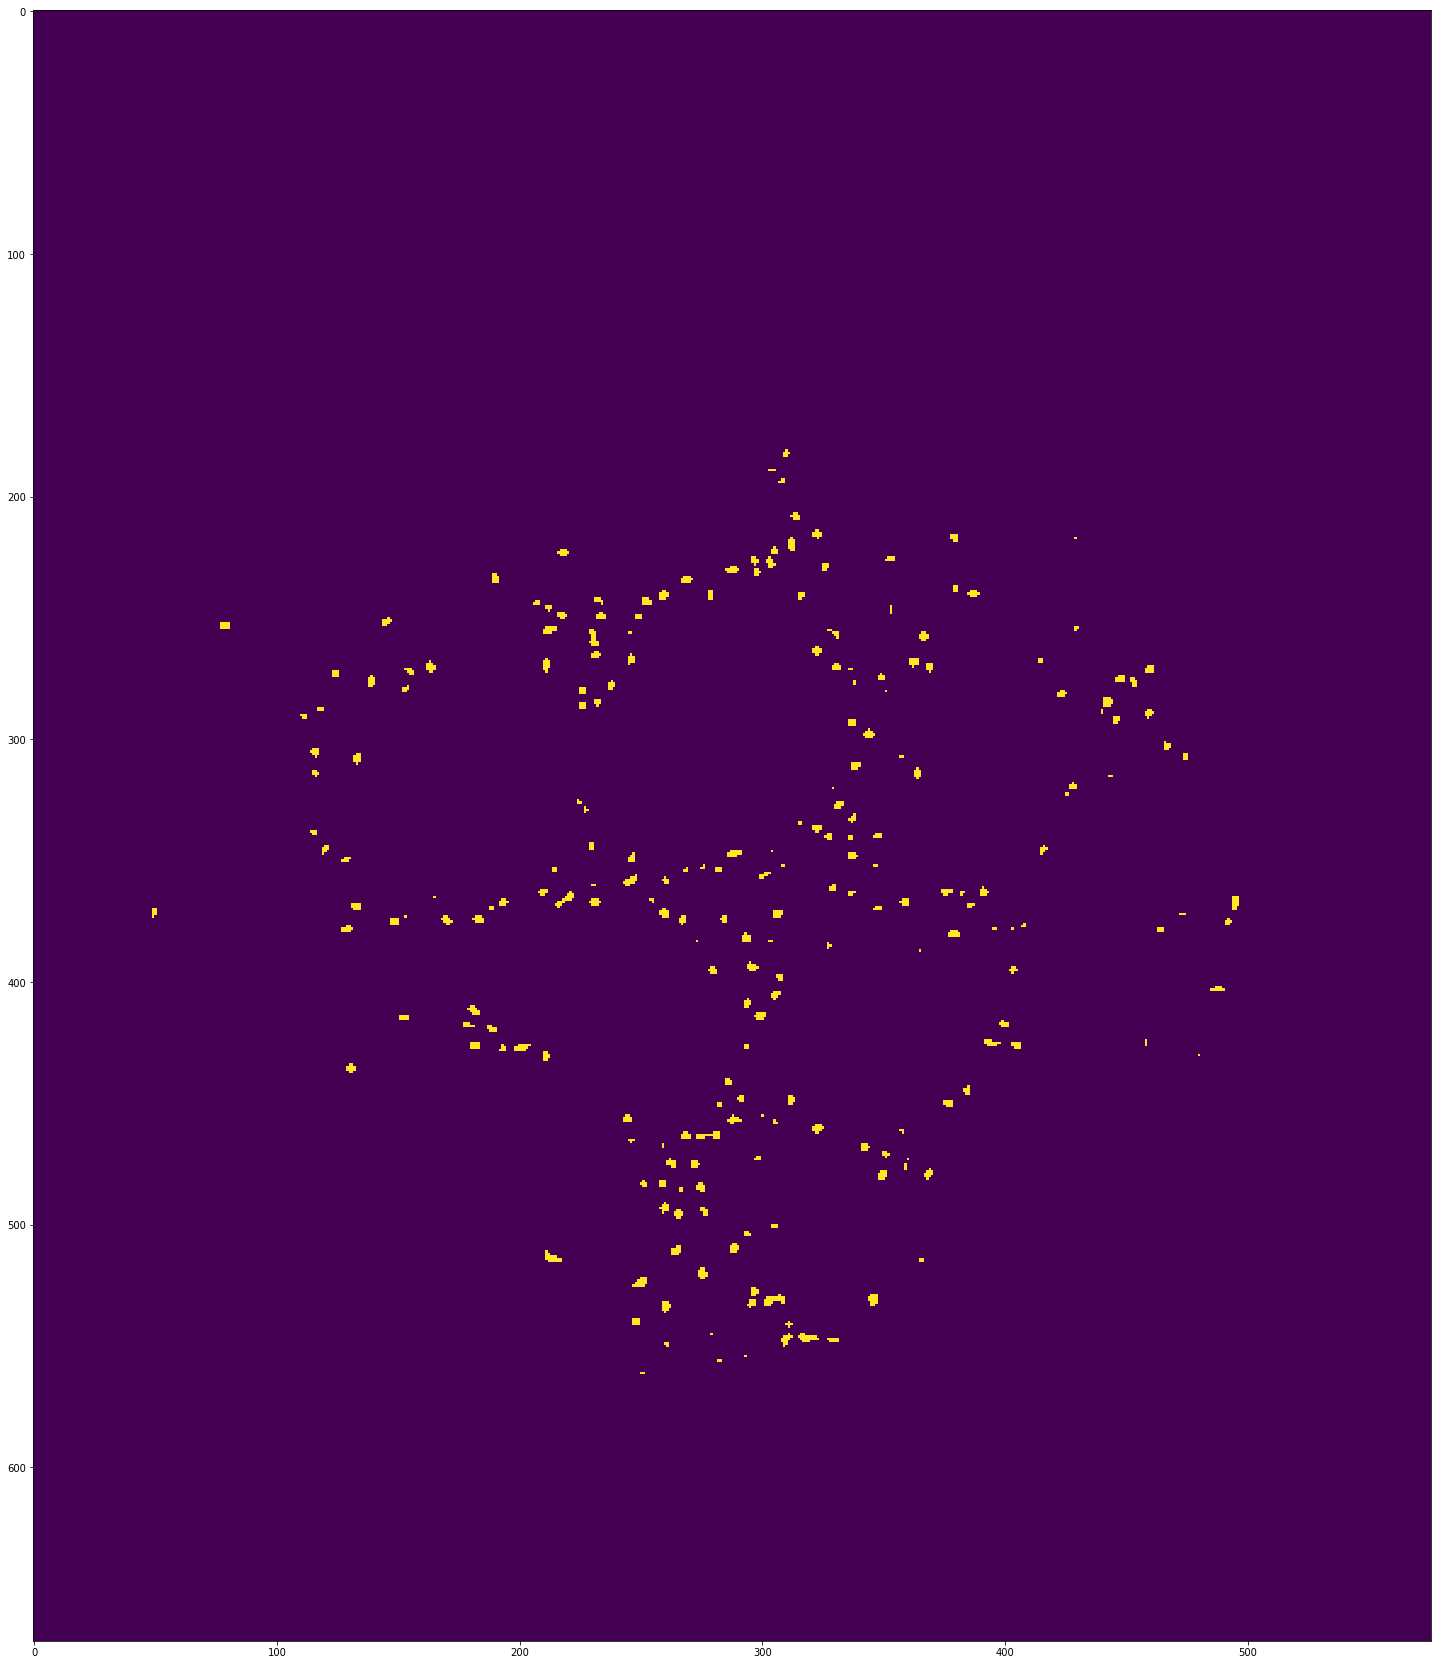

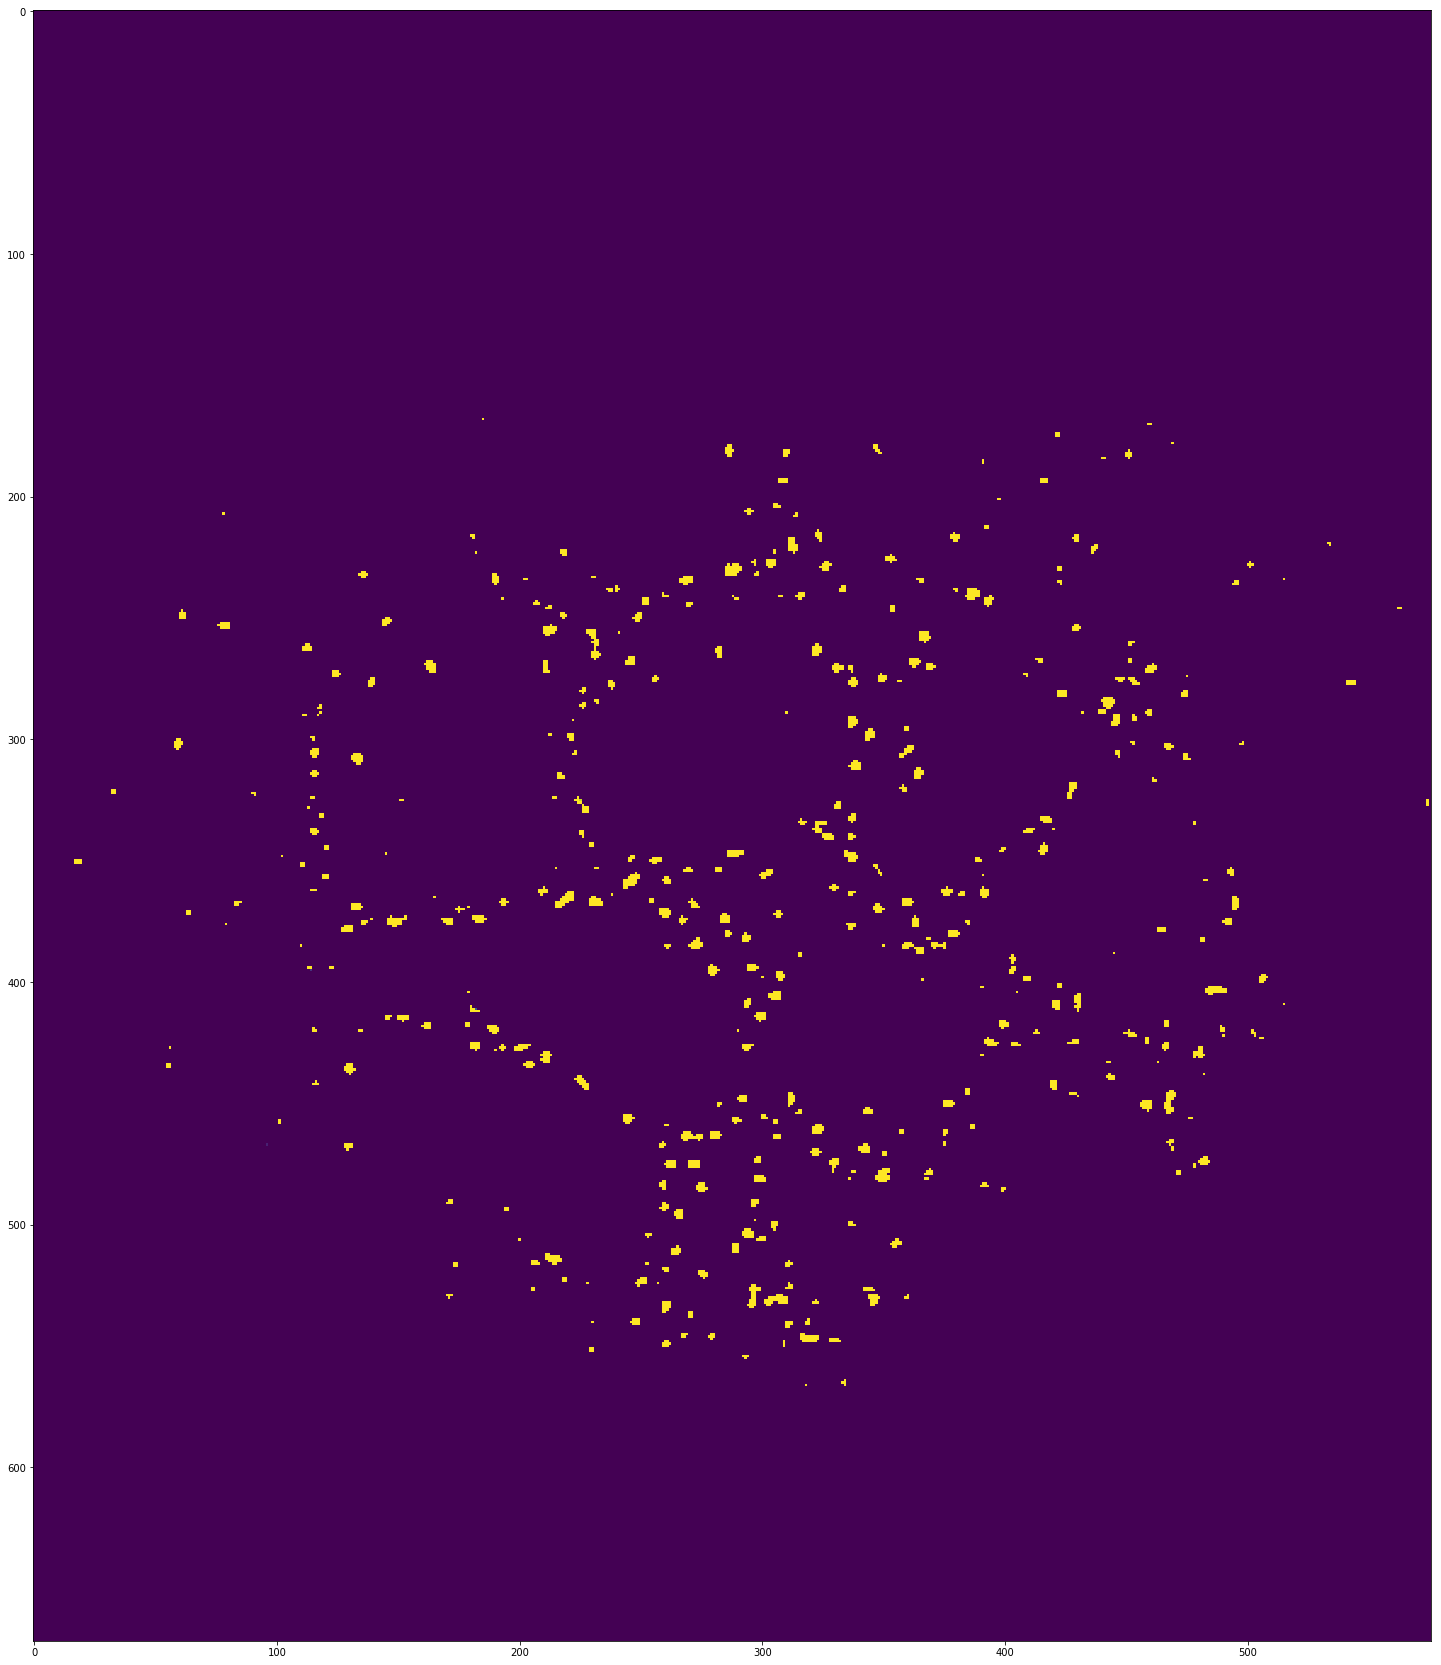

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]

display_slice_from_batch(skimage.external.tifffile.imread(image_path)[:192, :672, :576].reshape(1, 192, 672, 576, 1), z=48)
display_slice_from_batch(skimage.external.tifffile.imread("/home/gauthamar11/pyLattice2/src/tensorflow/quickUnet/dataset/extras/dmask_02.tif")[:192, :672, :576].reshape(1, 192, 672, 576, 1), z=48)
display_slice_from_batch(mask, z=48)
#With sep17_largeframe_48_nonzero_standardized_local_more_epochs on larger data size, with no offset

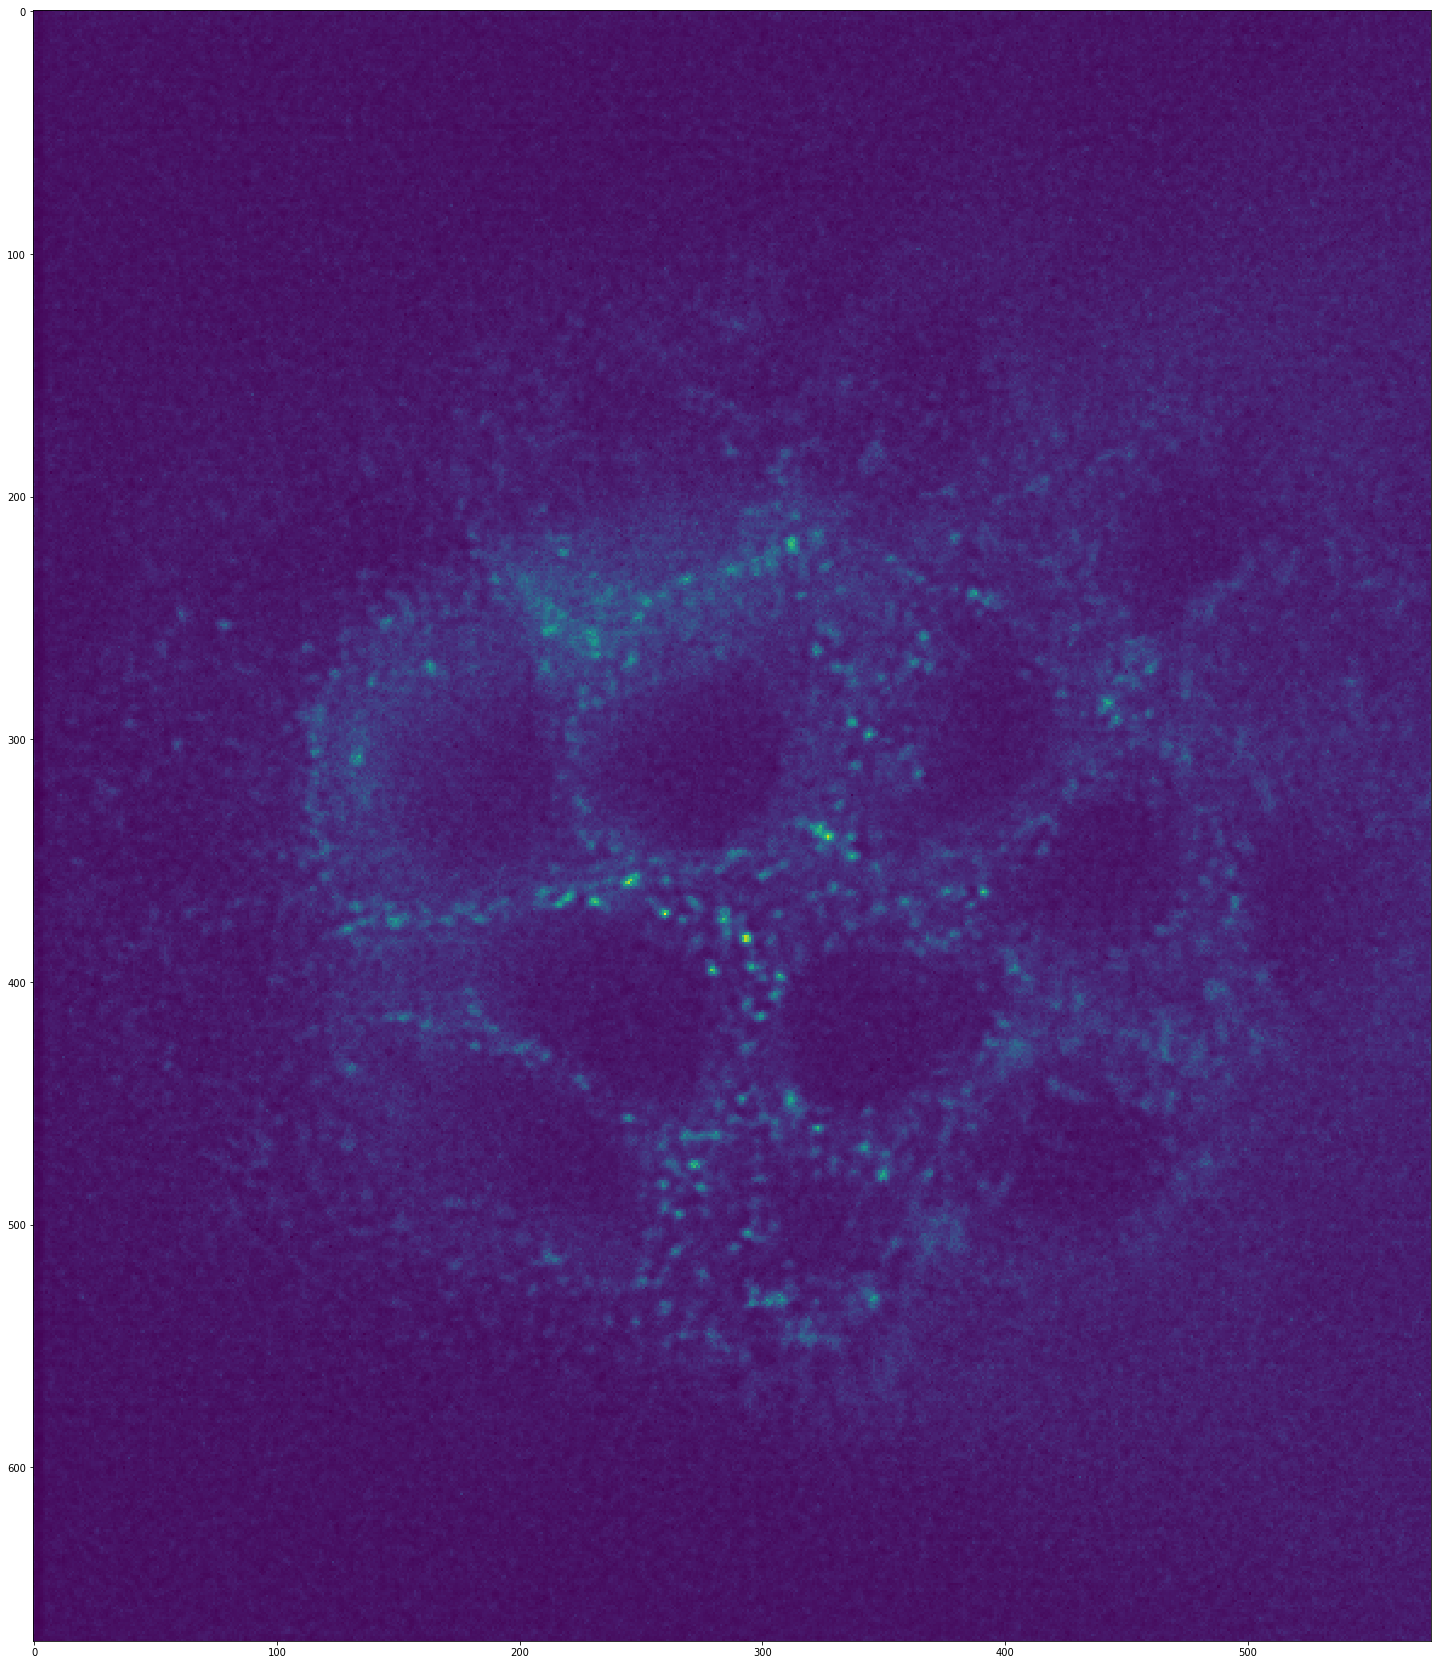

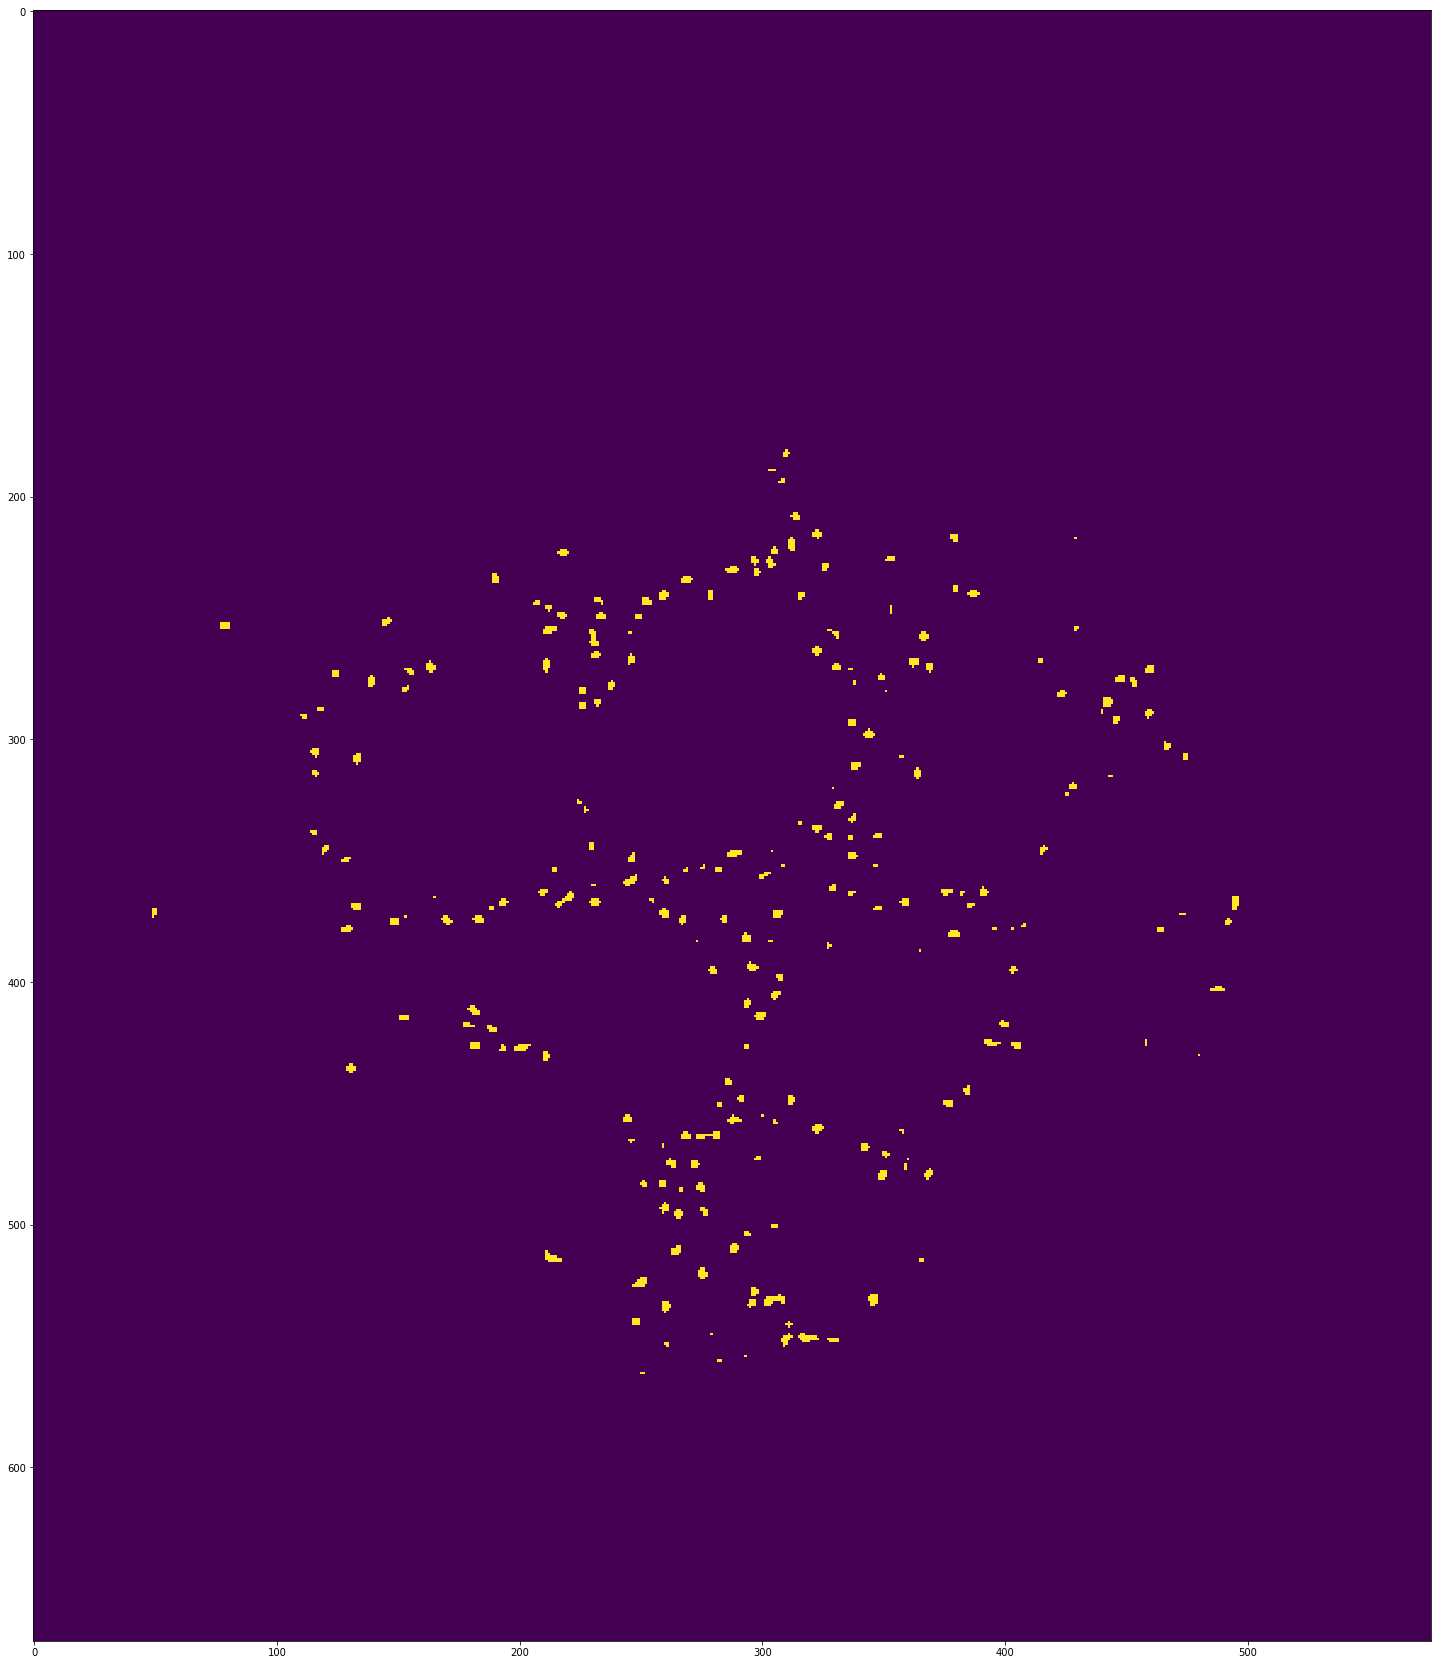

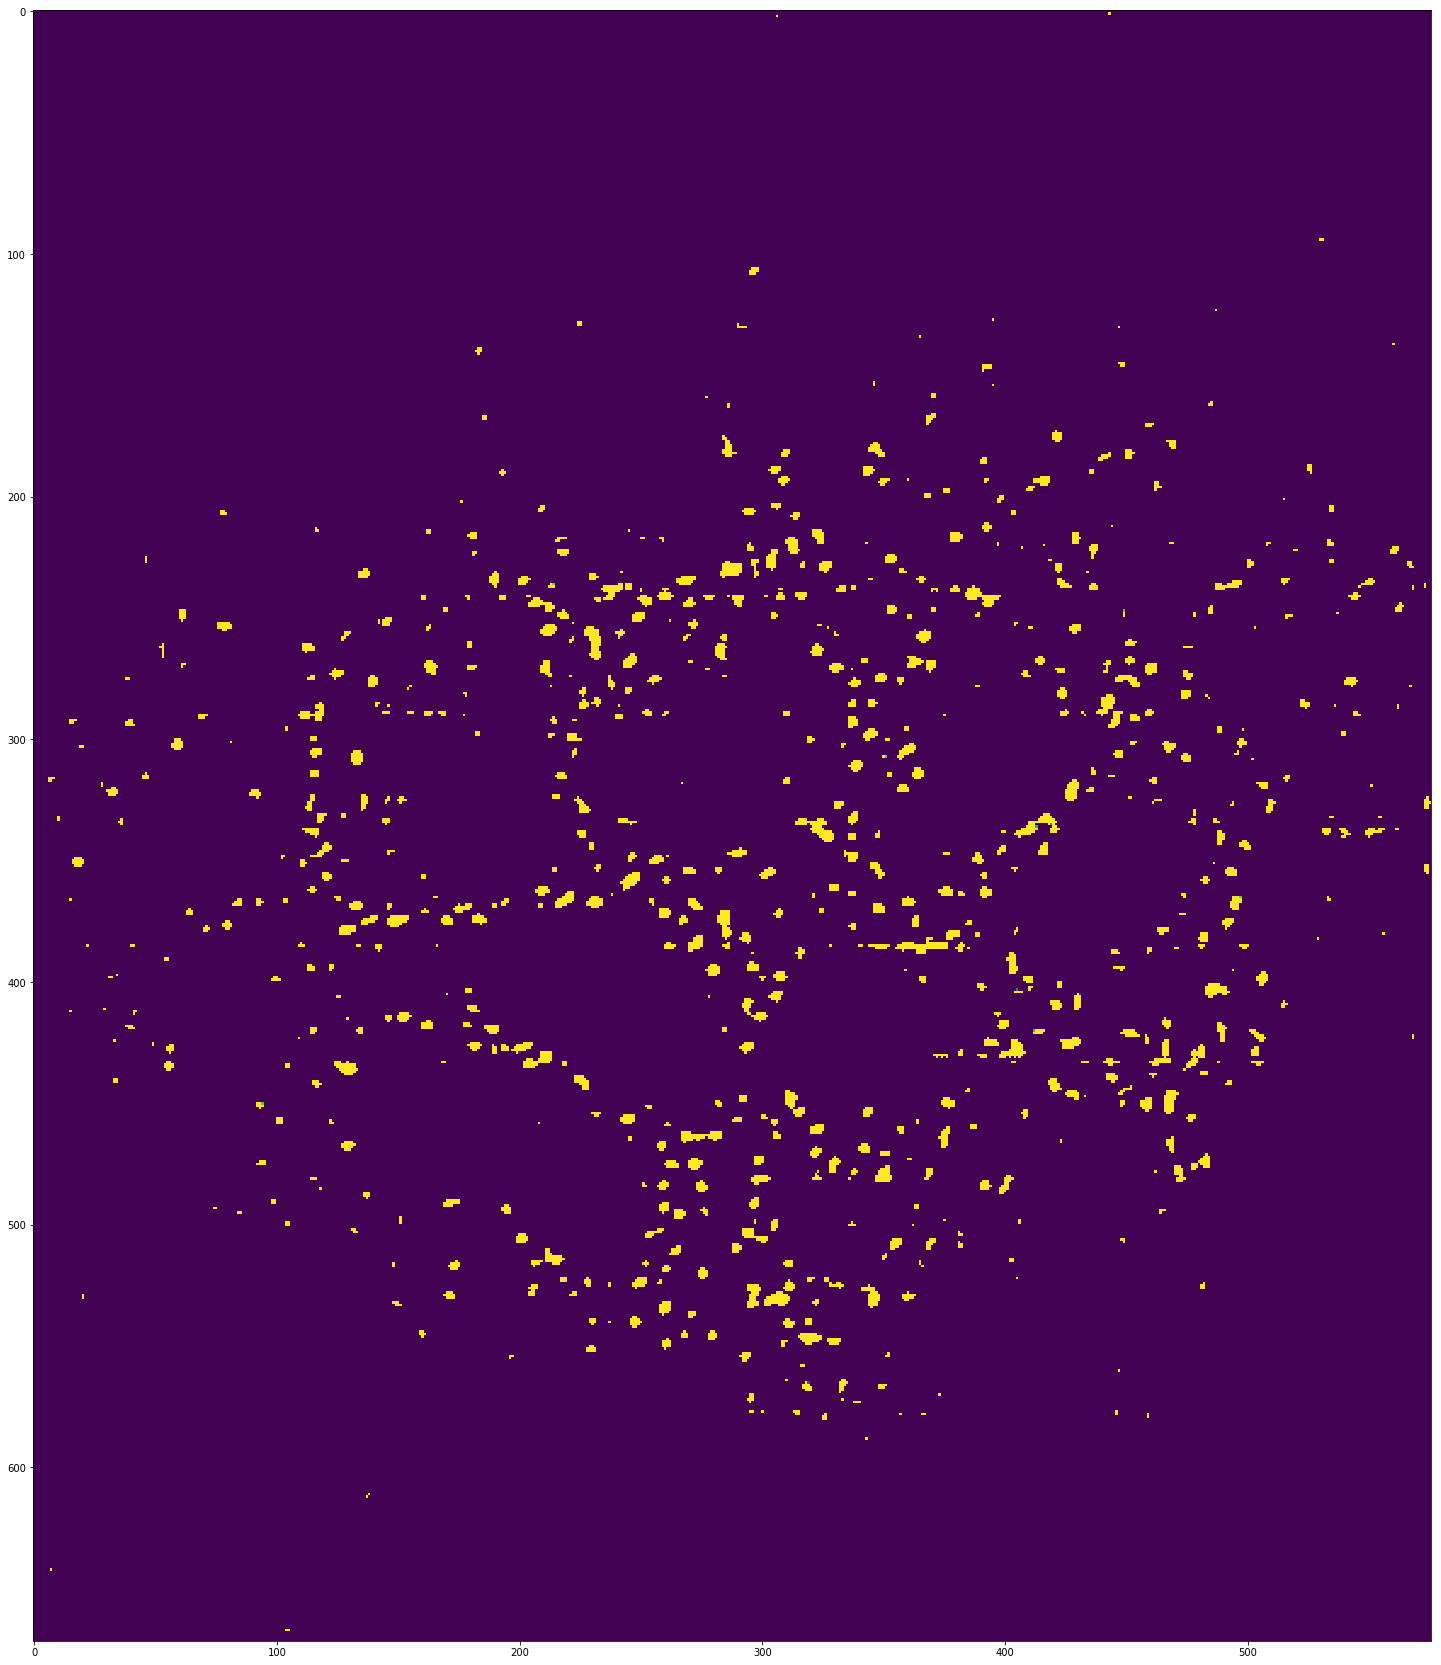

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]

display_slice_from_batch(skimage.external.tifffile.imread(image_path)[:192, :672, :576].reshape(1, 192, 672, 576, 1), z=48)
display_slice_from_batch(skimage.external.tifffile.imread("/home/gauthamar11/pyLattice2/src/tensorflow/quickUnet/dataset/extras/dmask_02.tif")[:192, :672, :576].reshape(1, 192, 672, 576, 1), z=48)
display_slice_from_batch(mask, z=48)
#With sep17_largeframe_48_nonzero_standardized_global_more_epochs on larger data size, with offset of 0 and 0

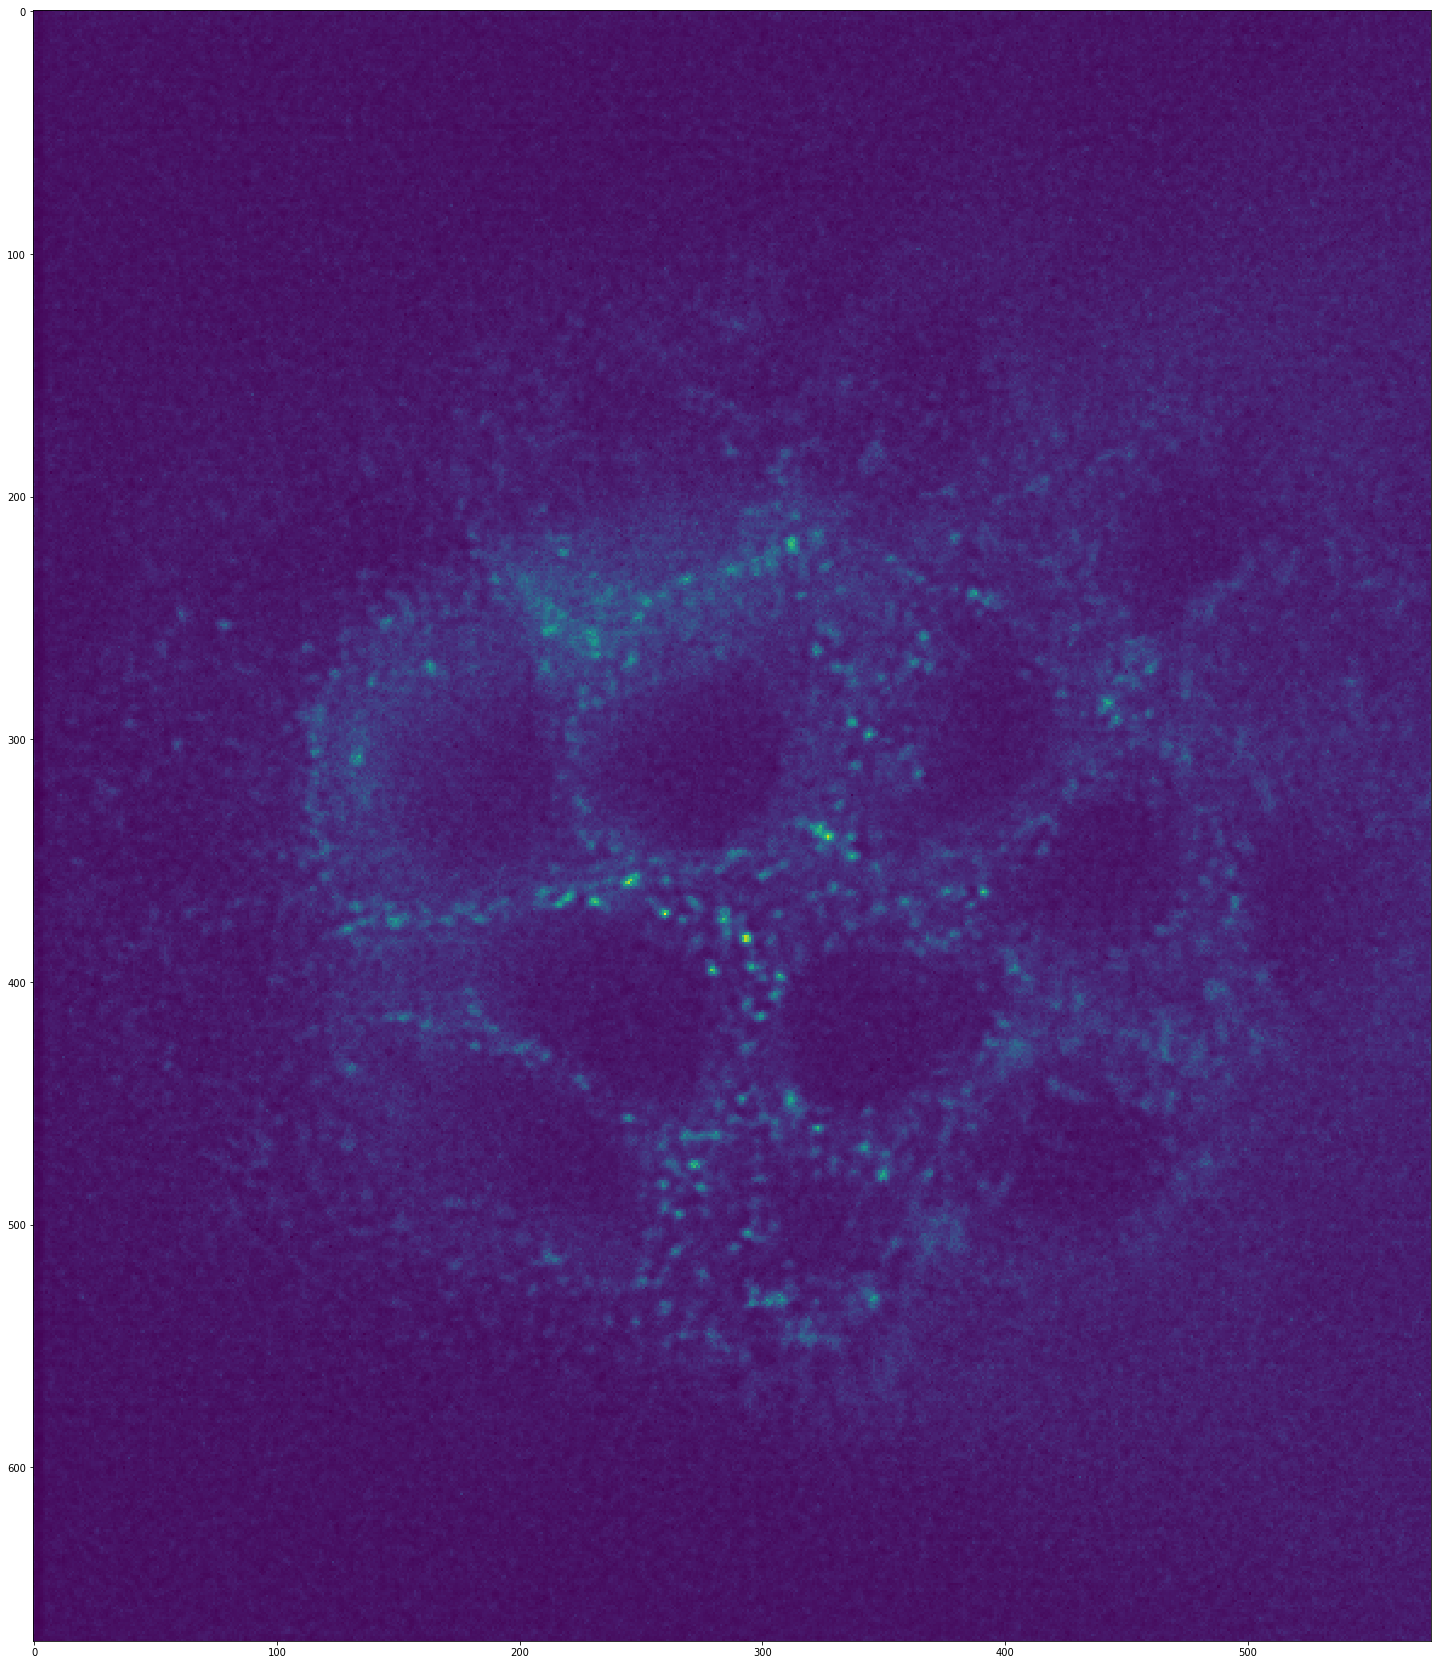

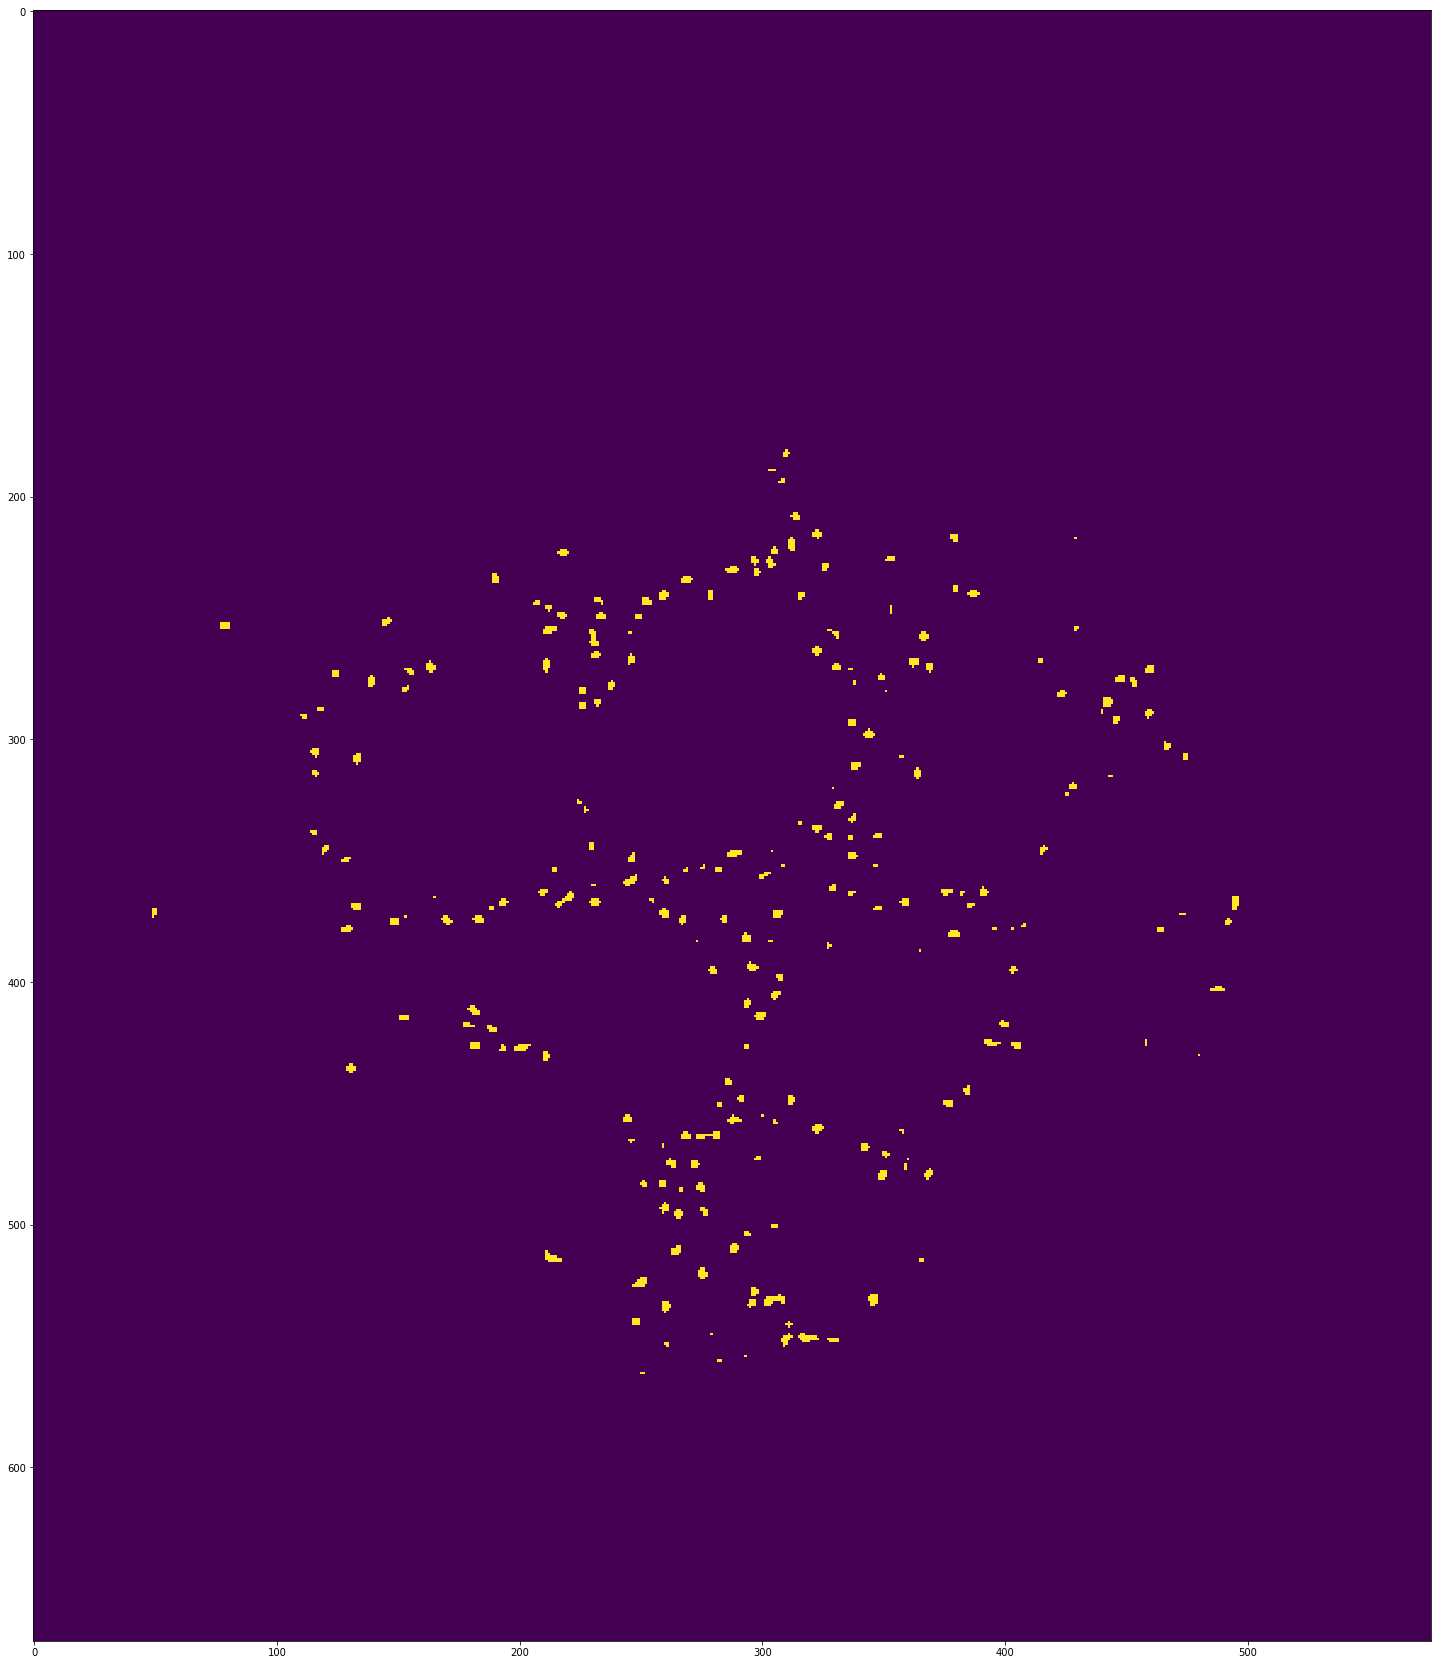

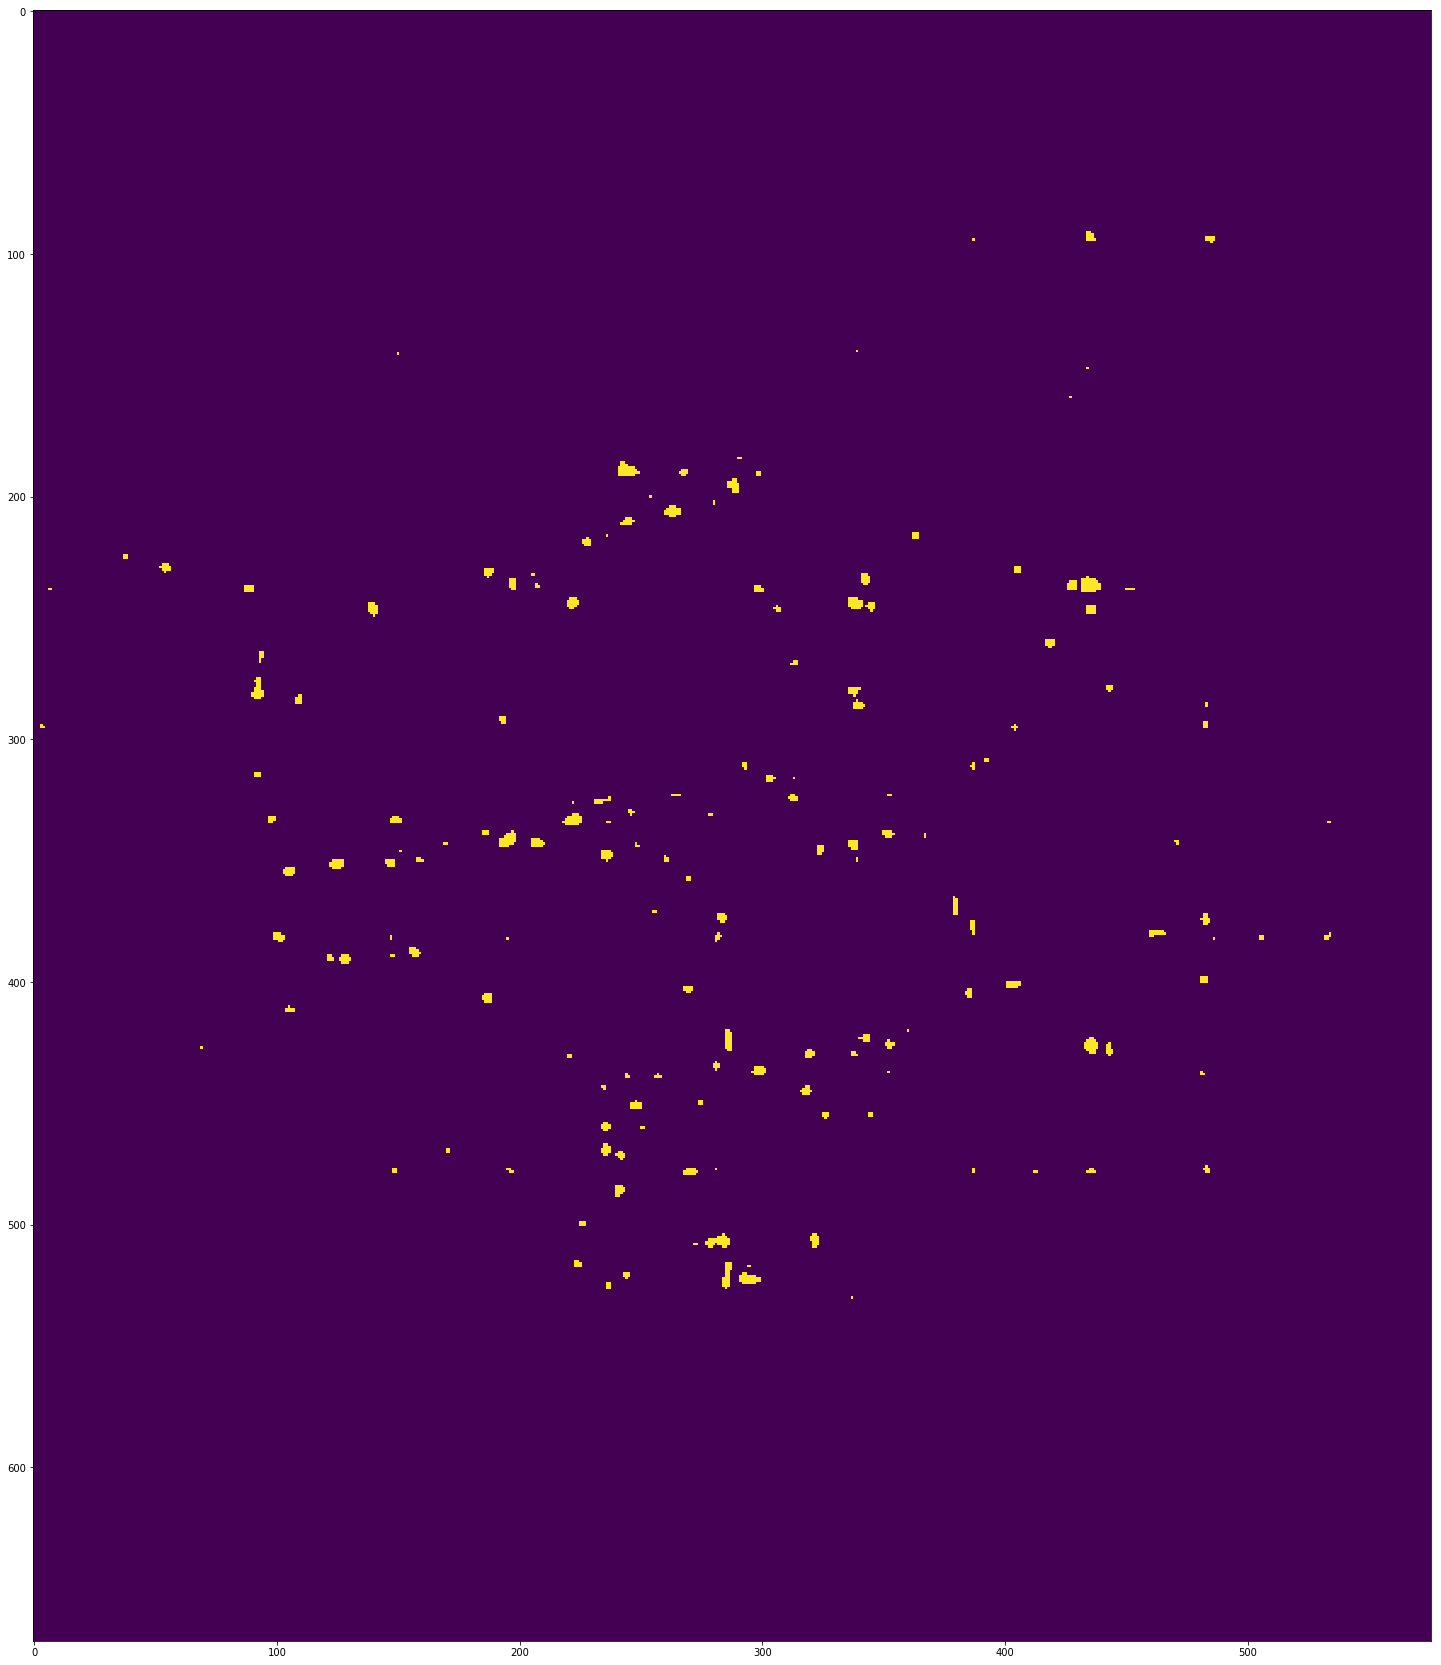

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]

display_slice_from_batch(skimage.external.tifffile.imread(image_path)[:192, :672, :576].reshape(1, 192, 672, 576, 1), z=48)
display_slice_from_batch(skimage.external.tifffile.imread("/home/gauthamar11/pyLattice2/src/tensorflow/quickUnet/dataset/extras/dmask_02.tif")[:192, :672, :576].reshape(1, 192, 672, 576, 1), z=48)
display_slice_from_batch(mask, z=48)
#With jul21_48_nonzero_standardized_global on larger data size, with offset of 24 in 2nd dim AND 3rd dim

/usr/local/lib/python3.5/dist-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


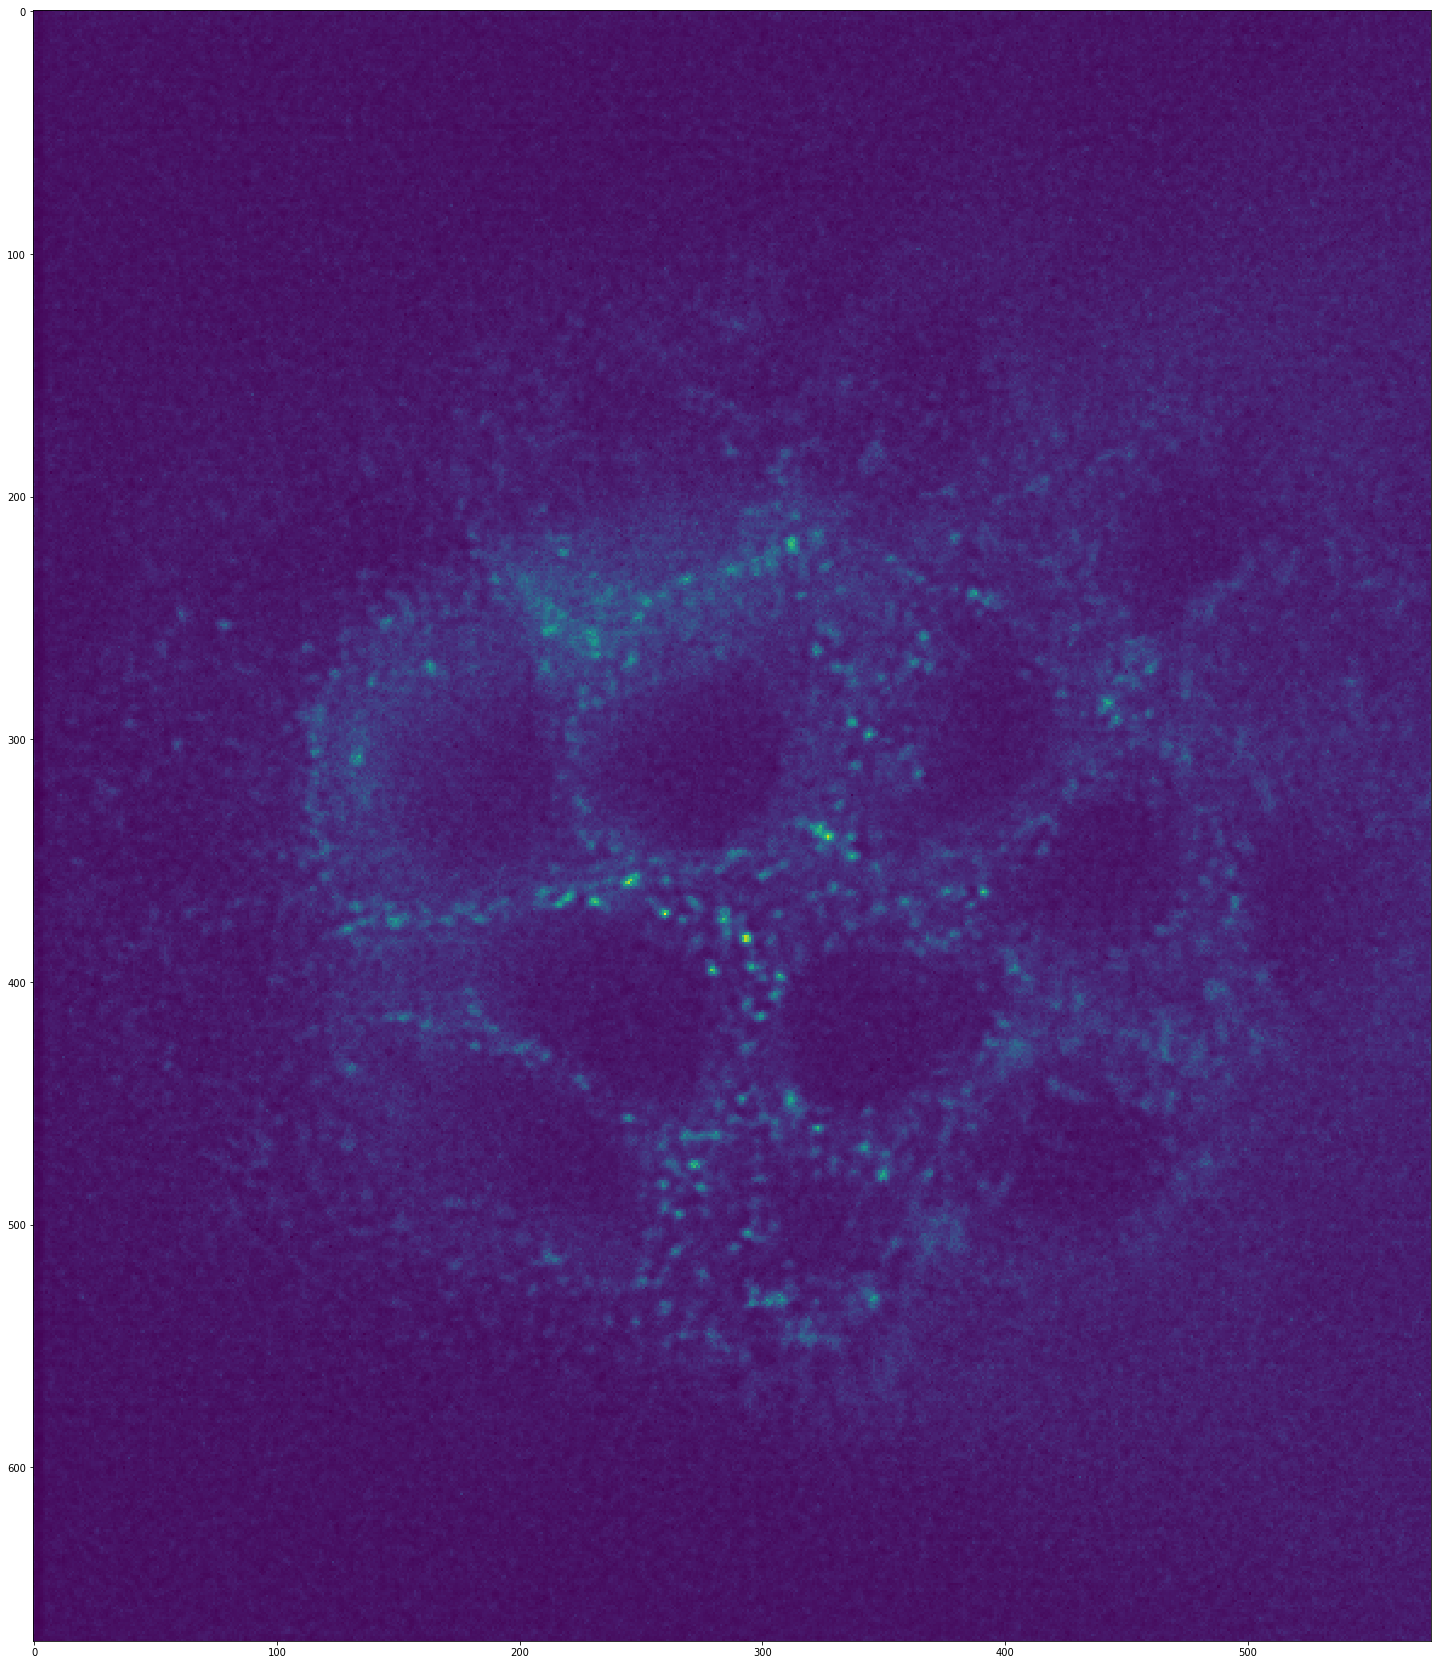

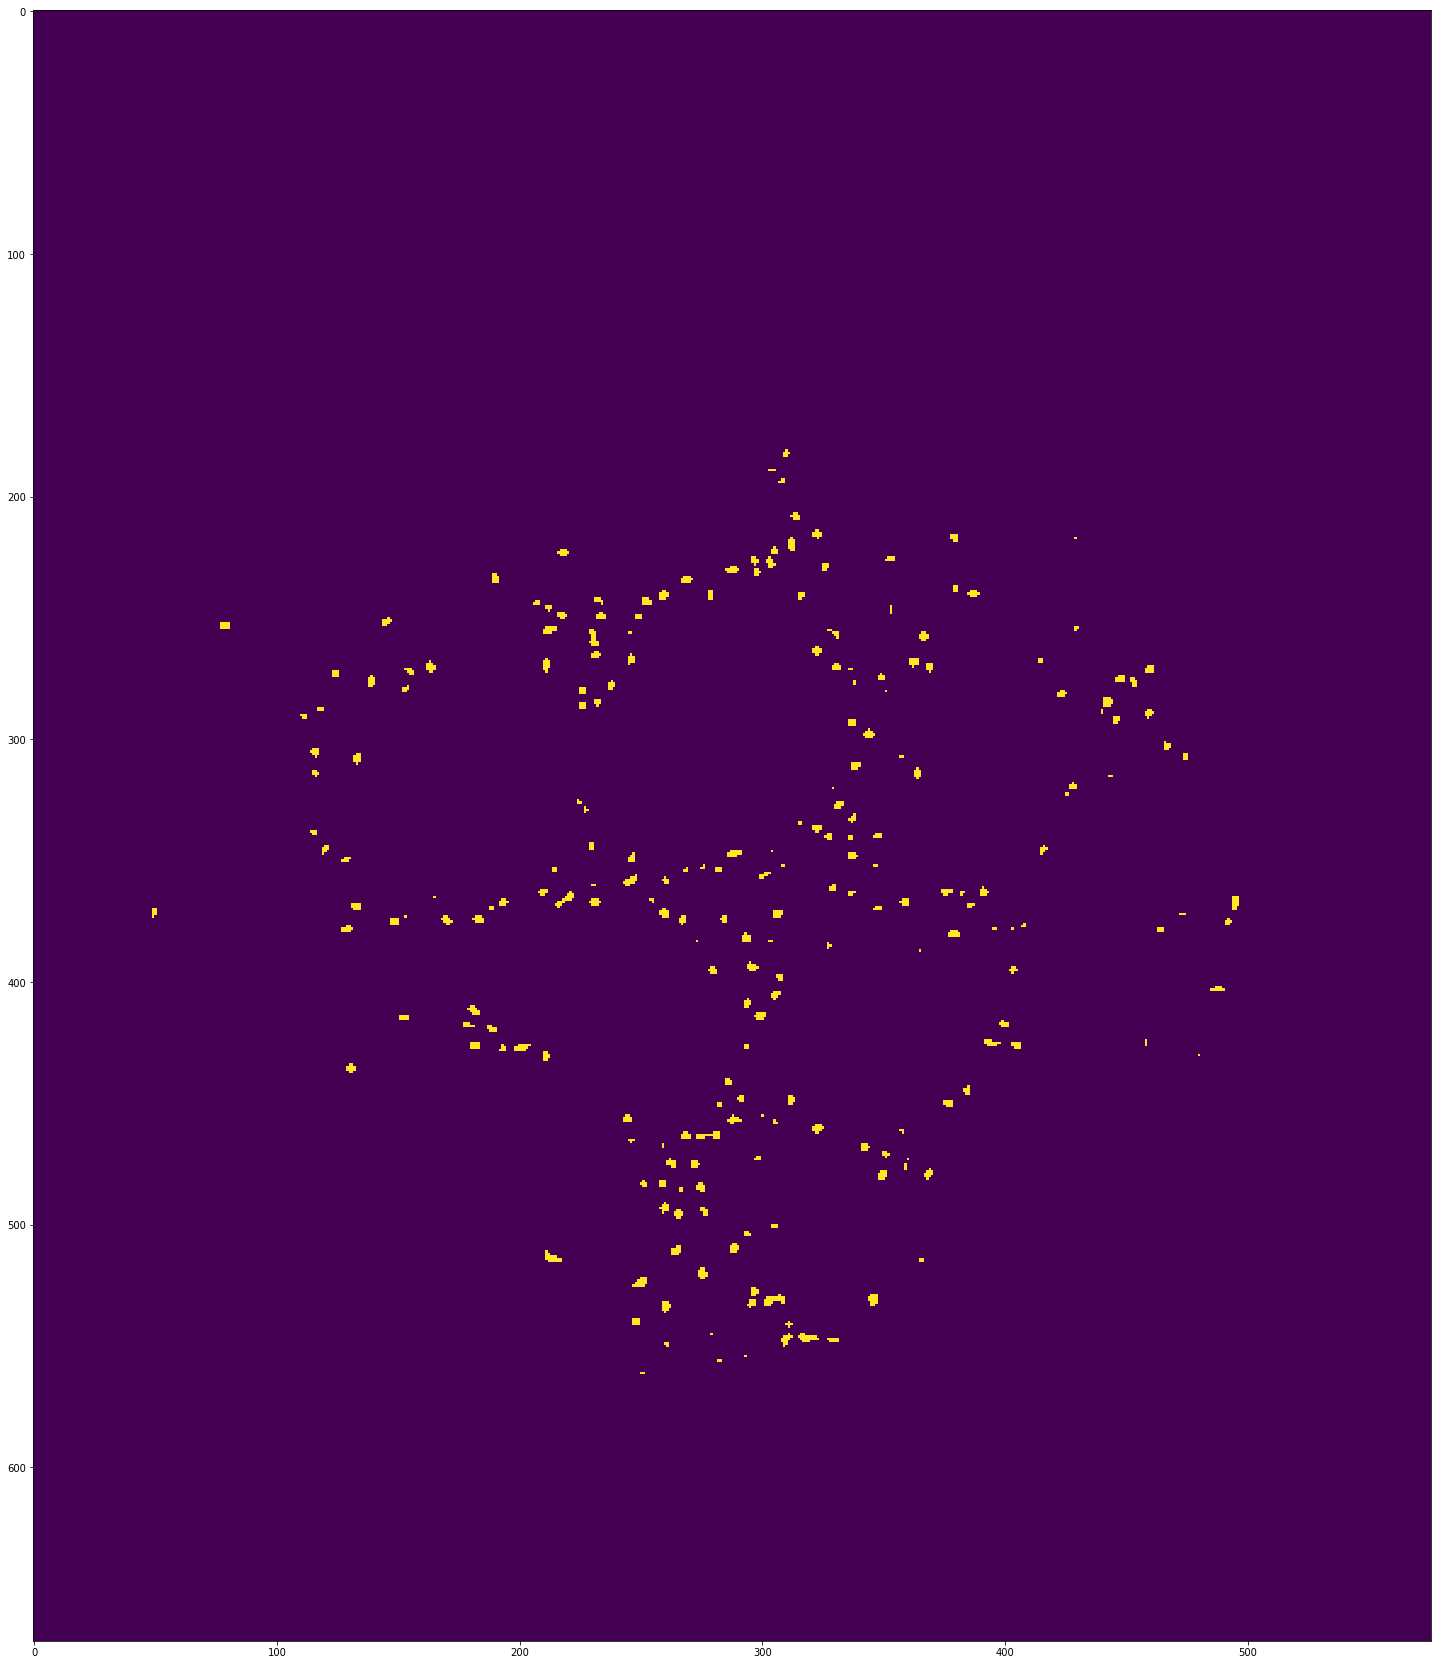

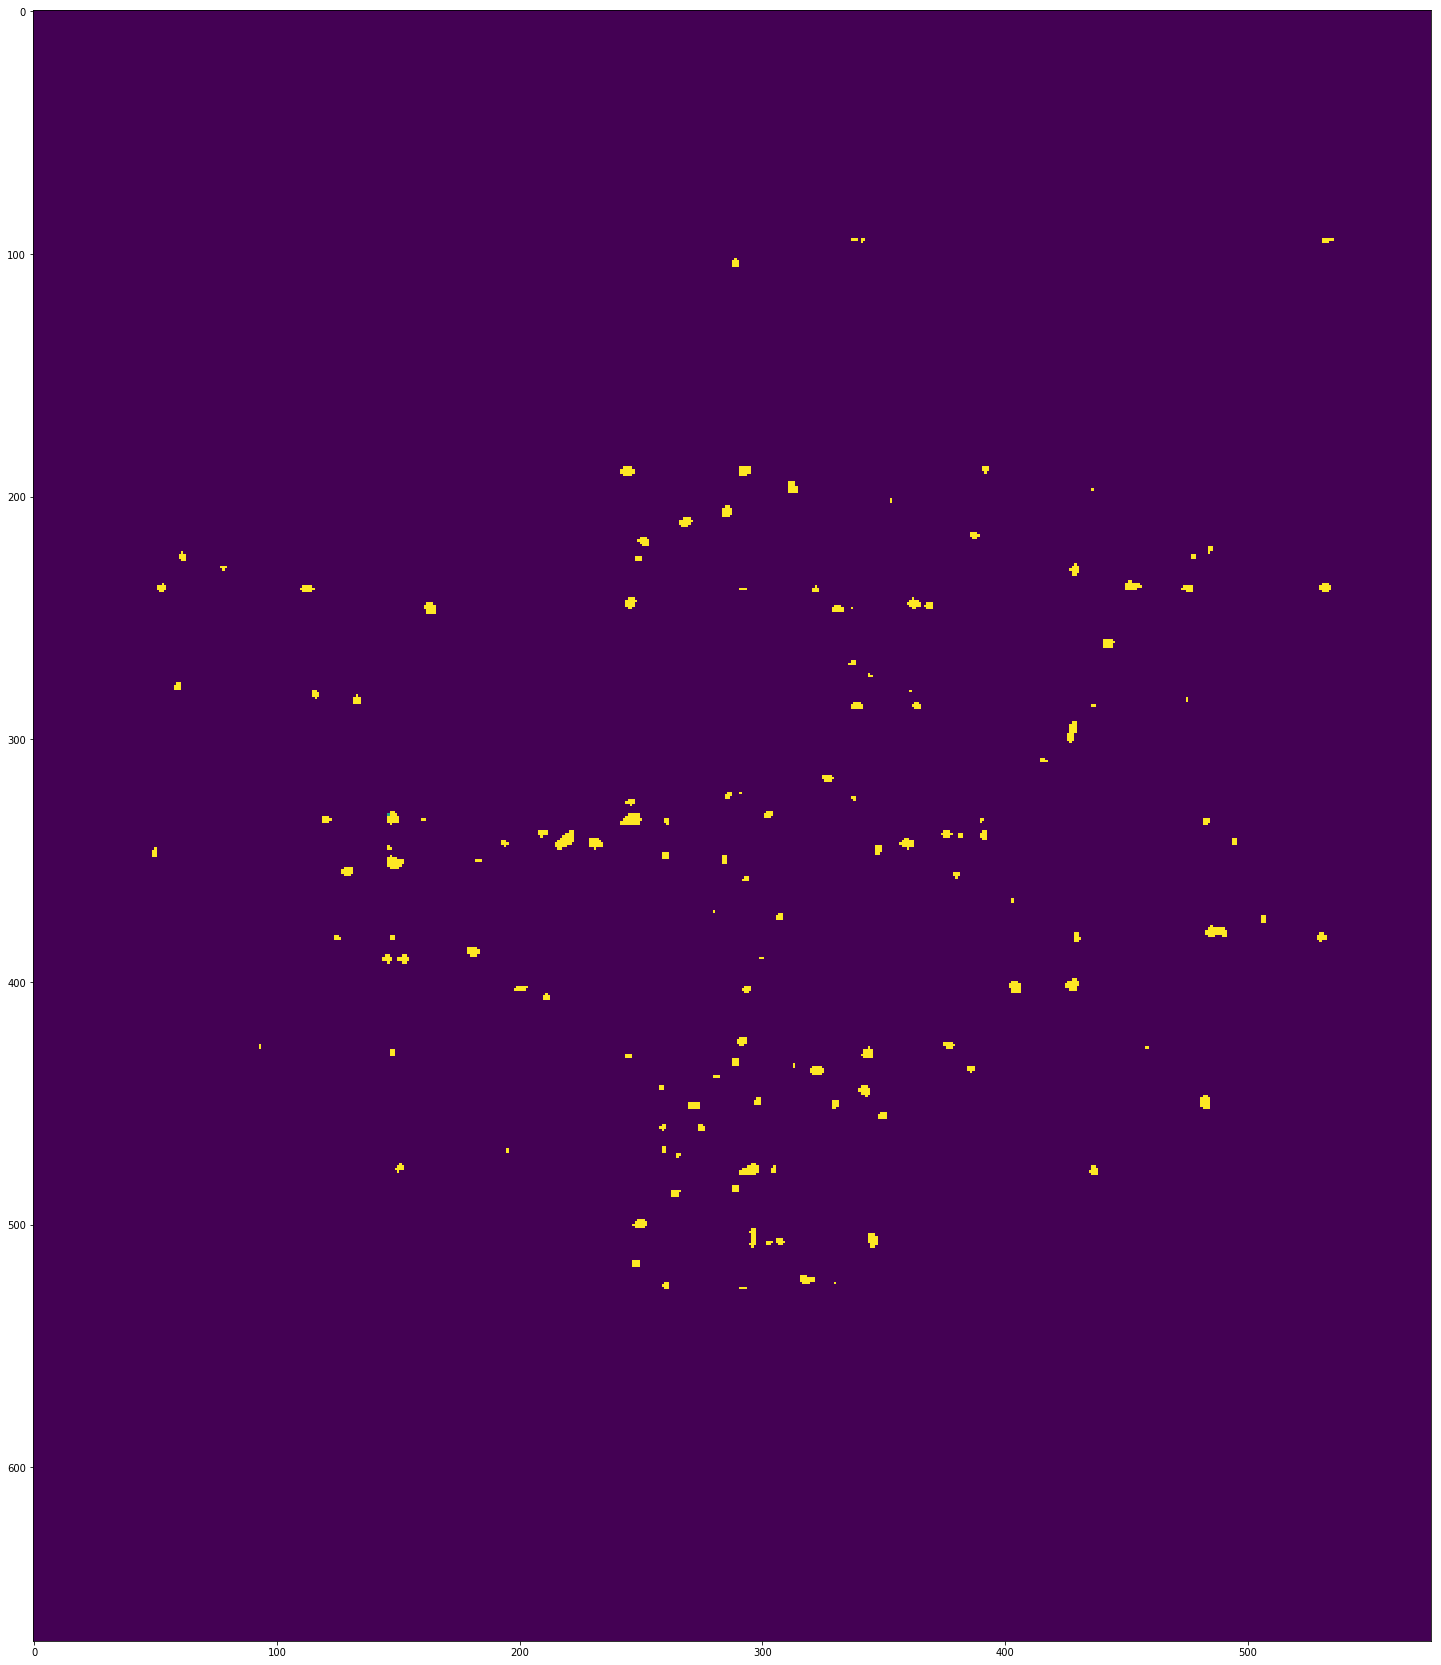

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]

display_slice_from_batch(skimage.external.tifffile.imread(image_path)[:192, :672, :576].reshape(1, 192, 672, 576, 1), z=48)
display_slice_from_batch(skimage.external.tifffile.imread("/home/gauthamar11/pyLattice2/src/tensorflow/quickUnet/dataset/extras/dmask_02.tif")[:192, :672, :576].reshape(1, 192, 672, 576, 1), z=48)
display_slice_from_batch(mask, z=48)
#With jul21_48_nonzero_standardized_global on larger data size, with offset of 24 in 2nd dim

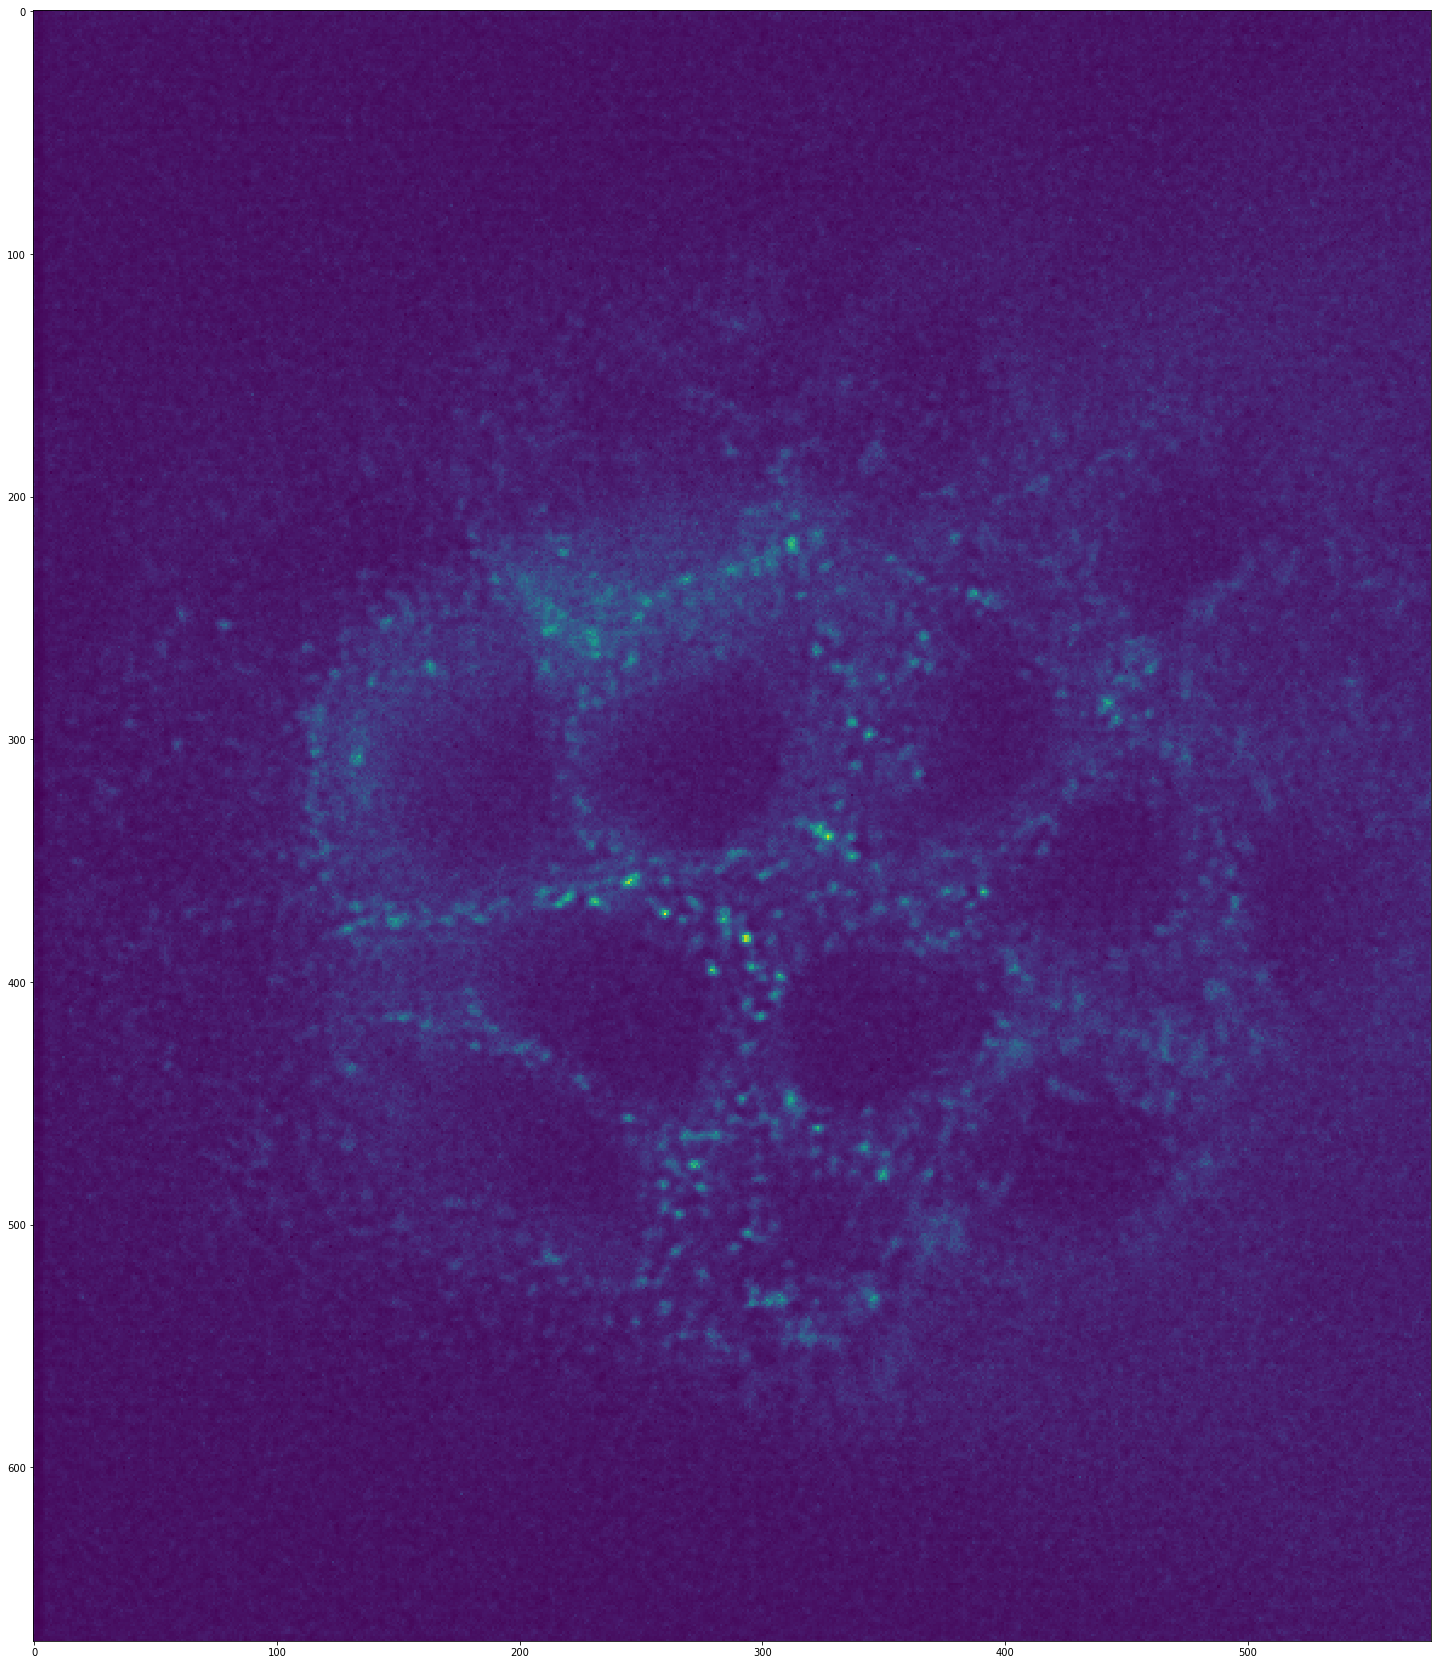

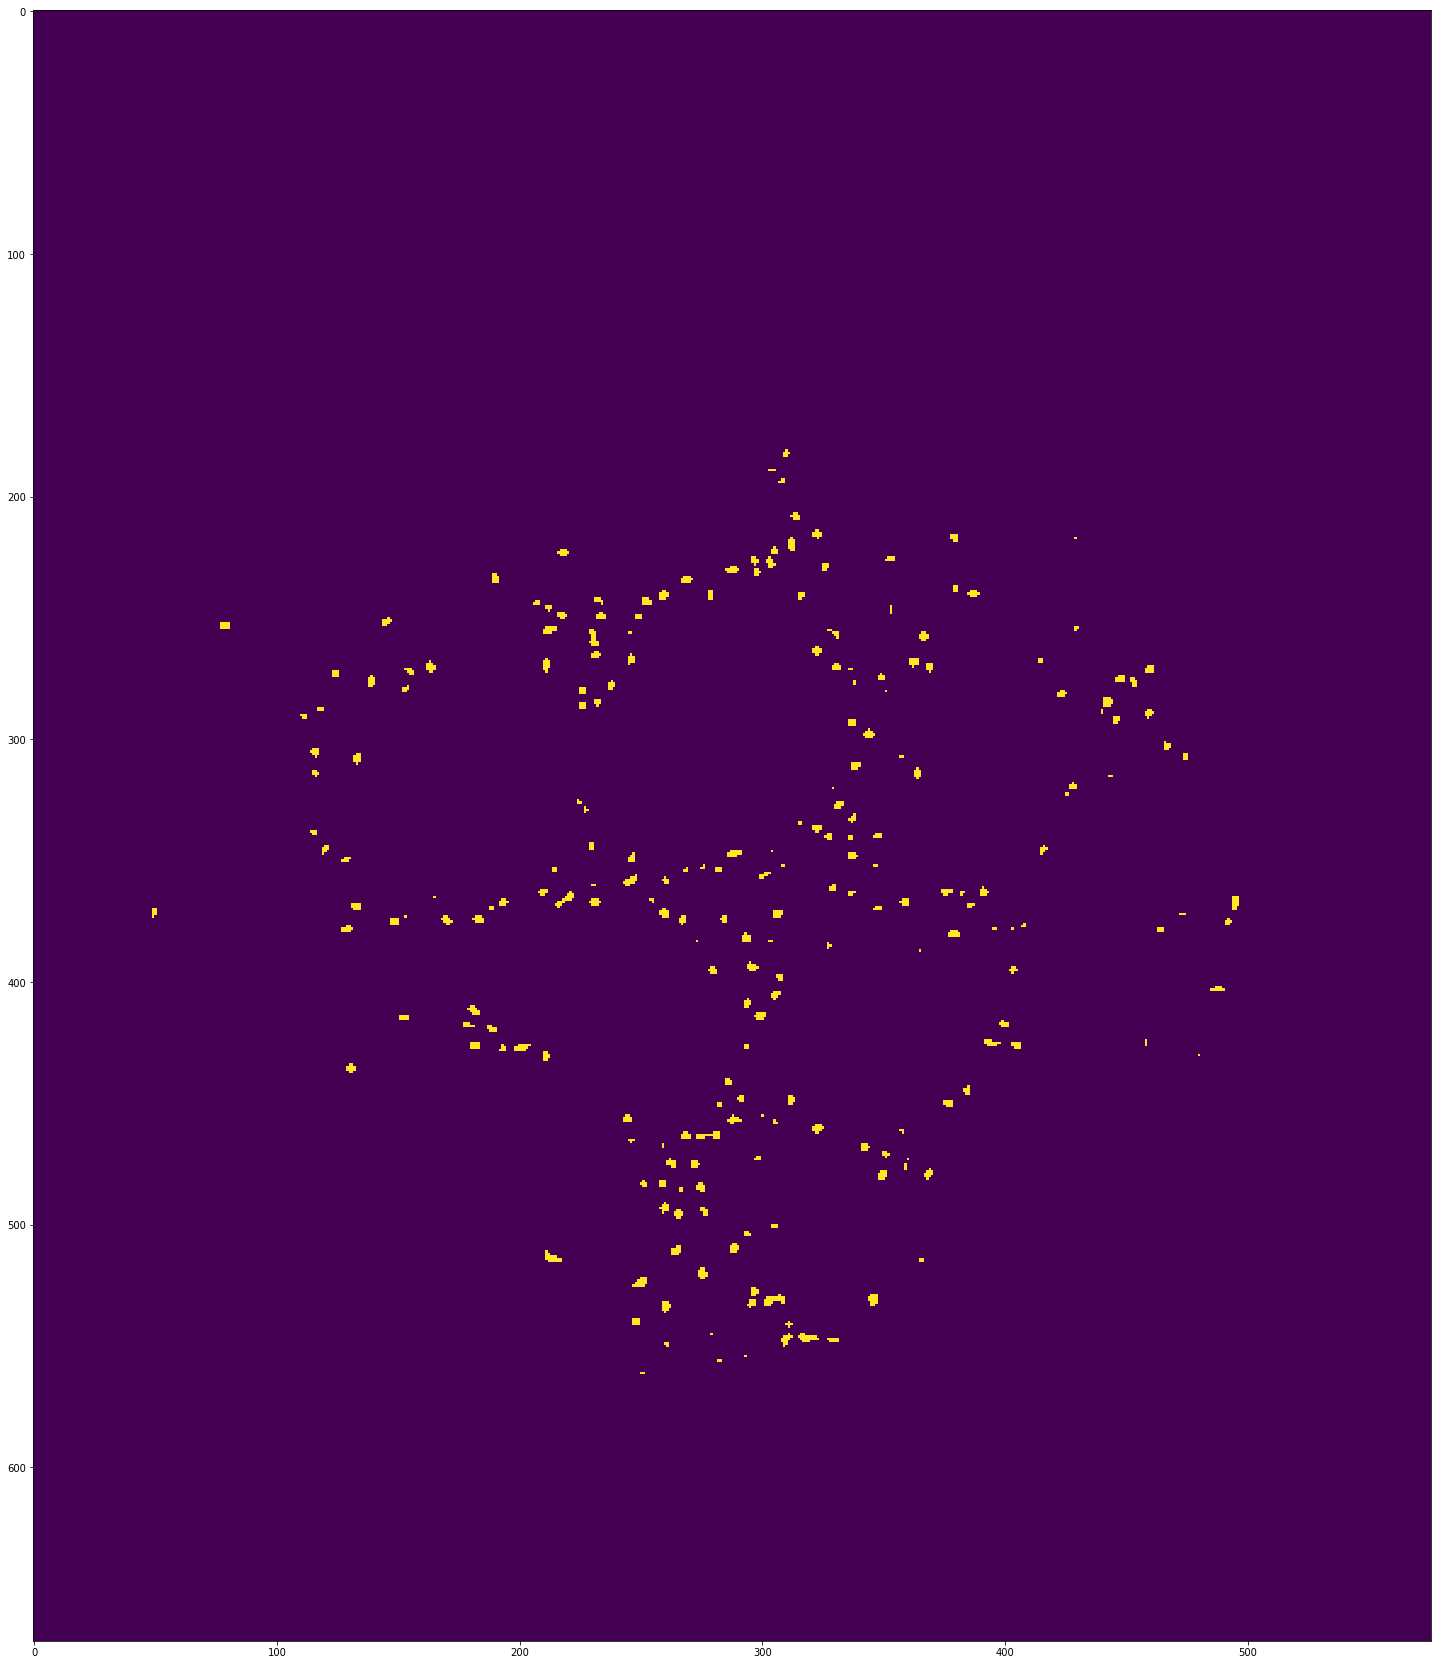

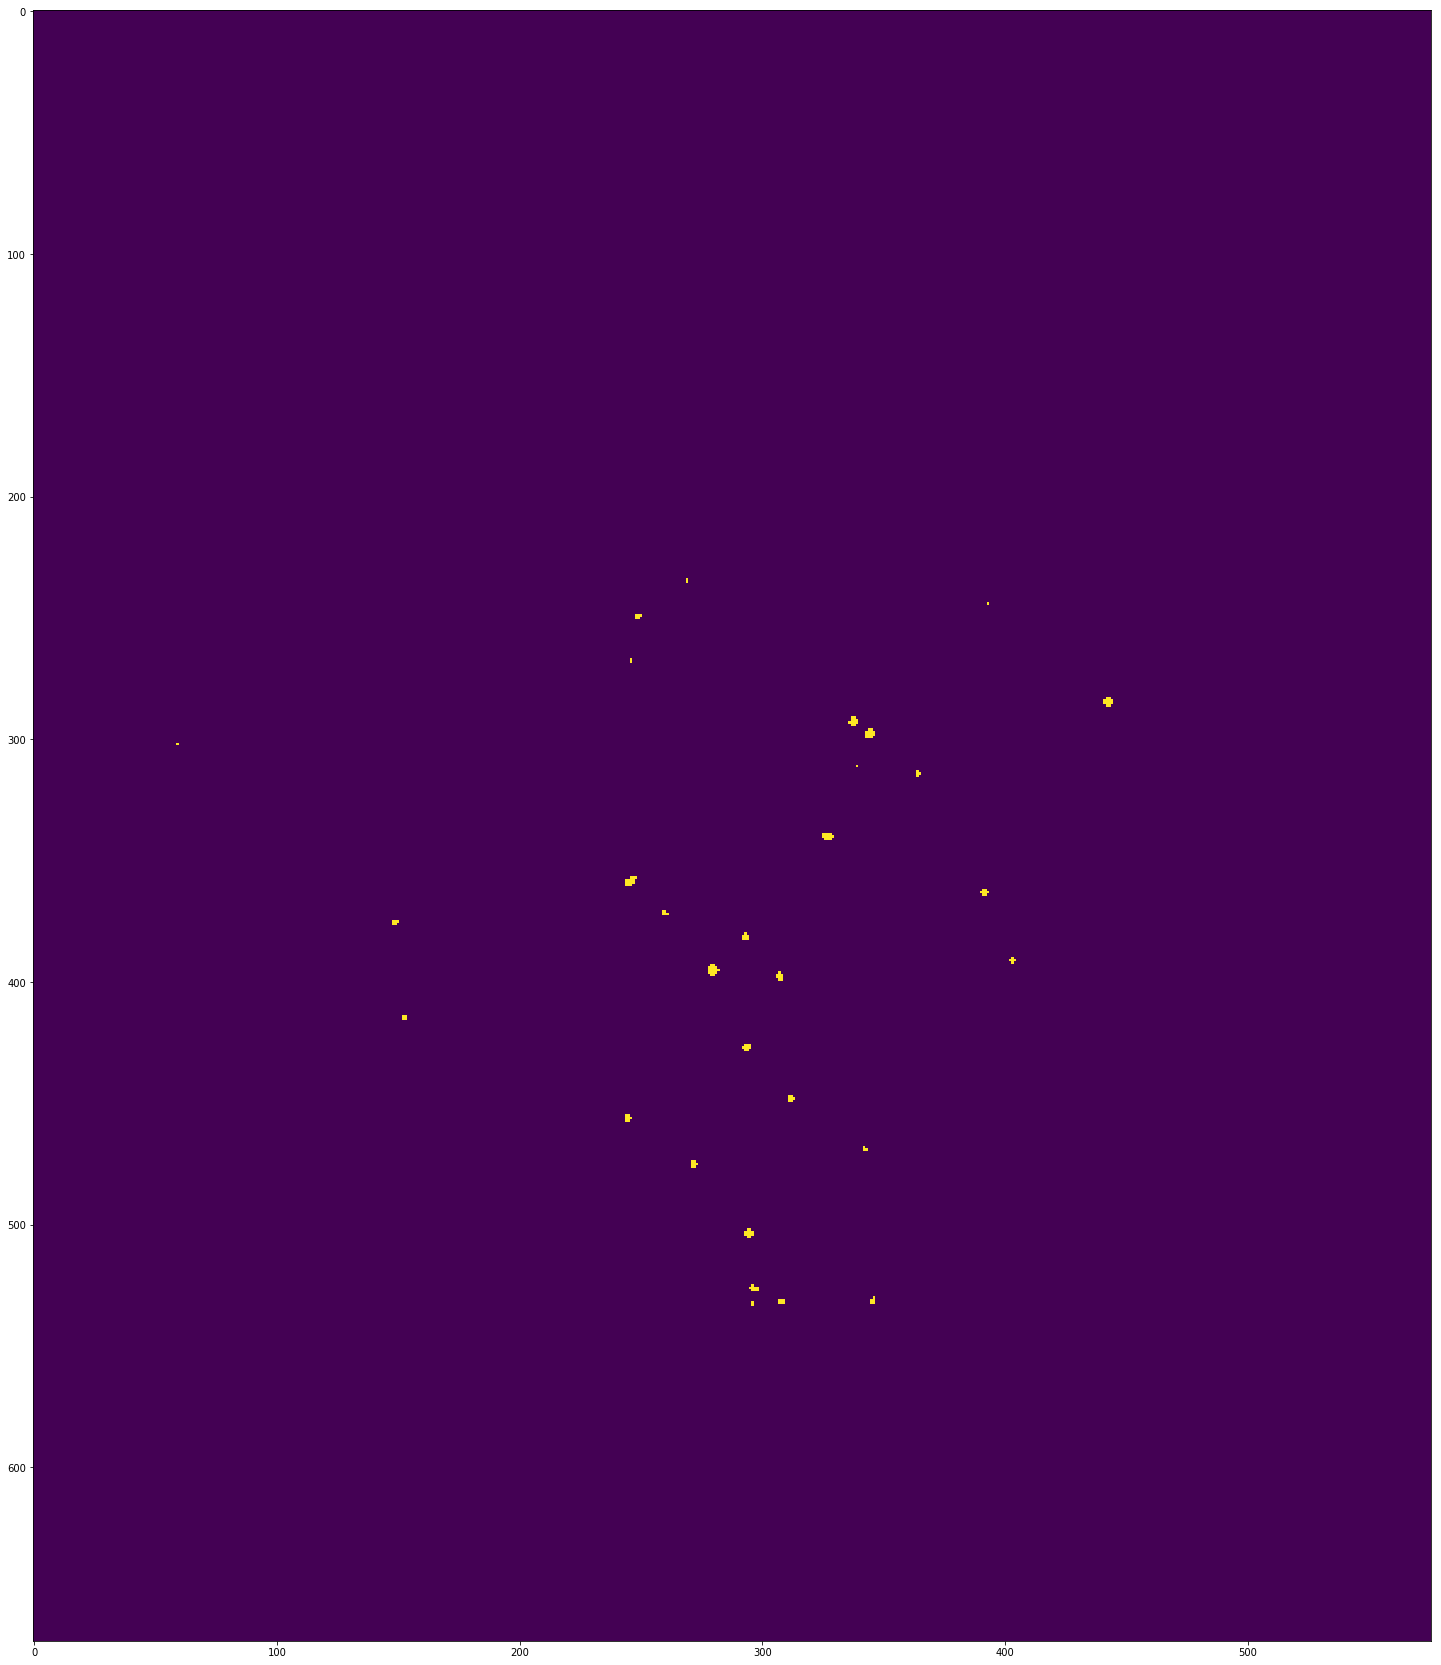

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]

display_slice_from_batch(skimage.external.tifffile.imread(image_path)[:192, :672, :576].reshape(1, 192, 672, 576, 1), z=48)
display_slice_from_batch(skimage.external.tifffile.imread("/home/gauthamar11/pyLattice2/src/tensorflow/quickUnet/dataset/extras/dmask_02.tif")[:192, :672, :576].reshape(1, 192, 672, 576, 1), z=48)
display_slice_from_batch(mask, z=48)
#With jul21_48_nonzero_standardized on larger data size

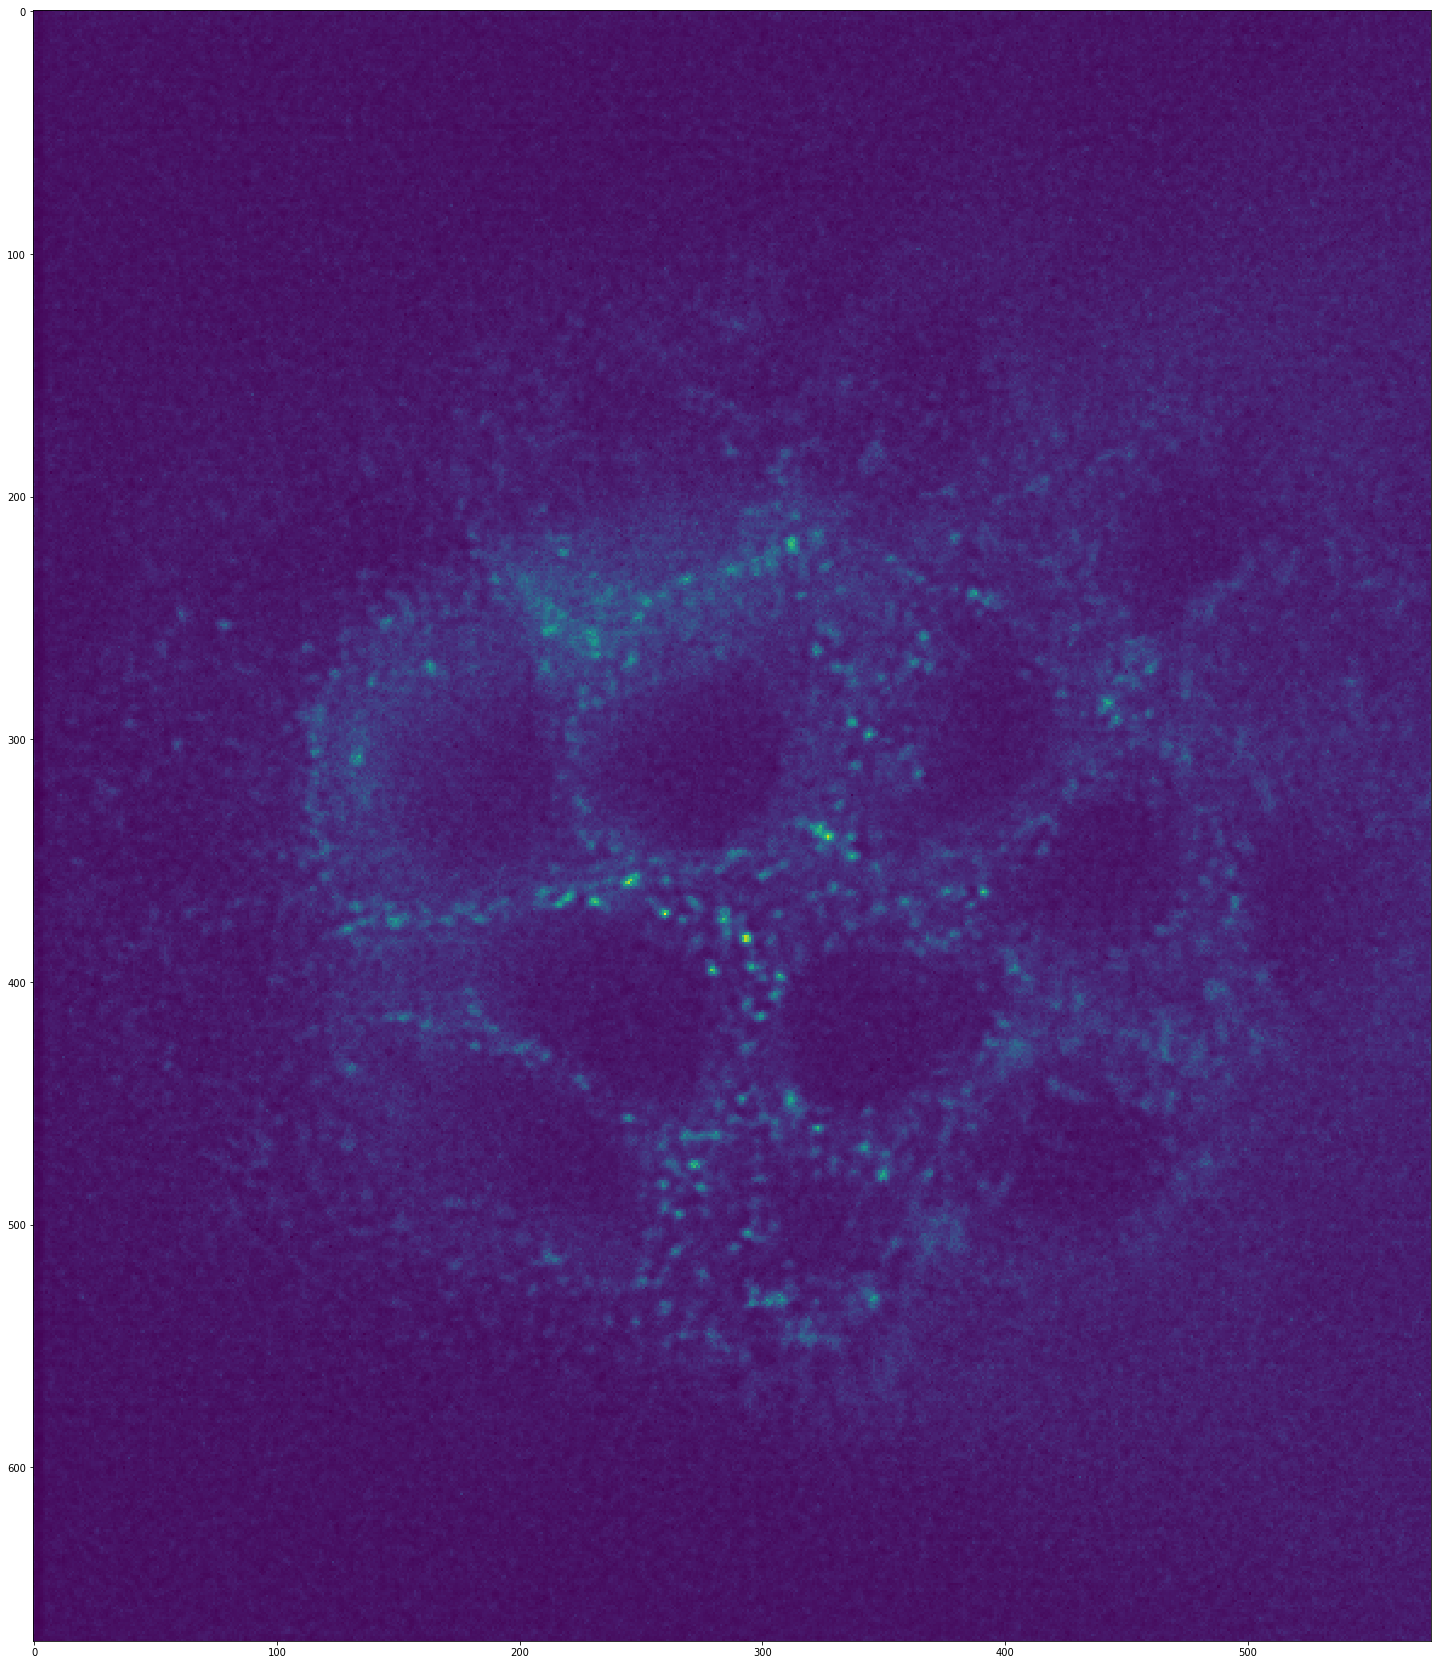

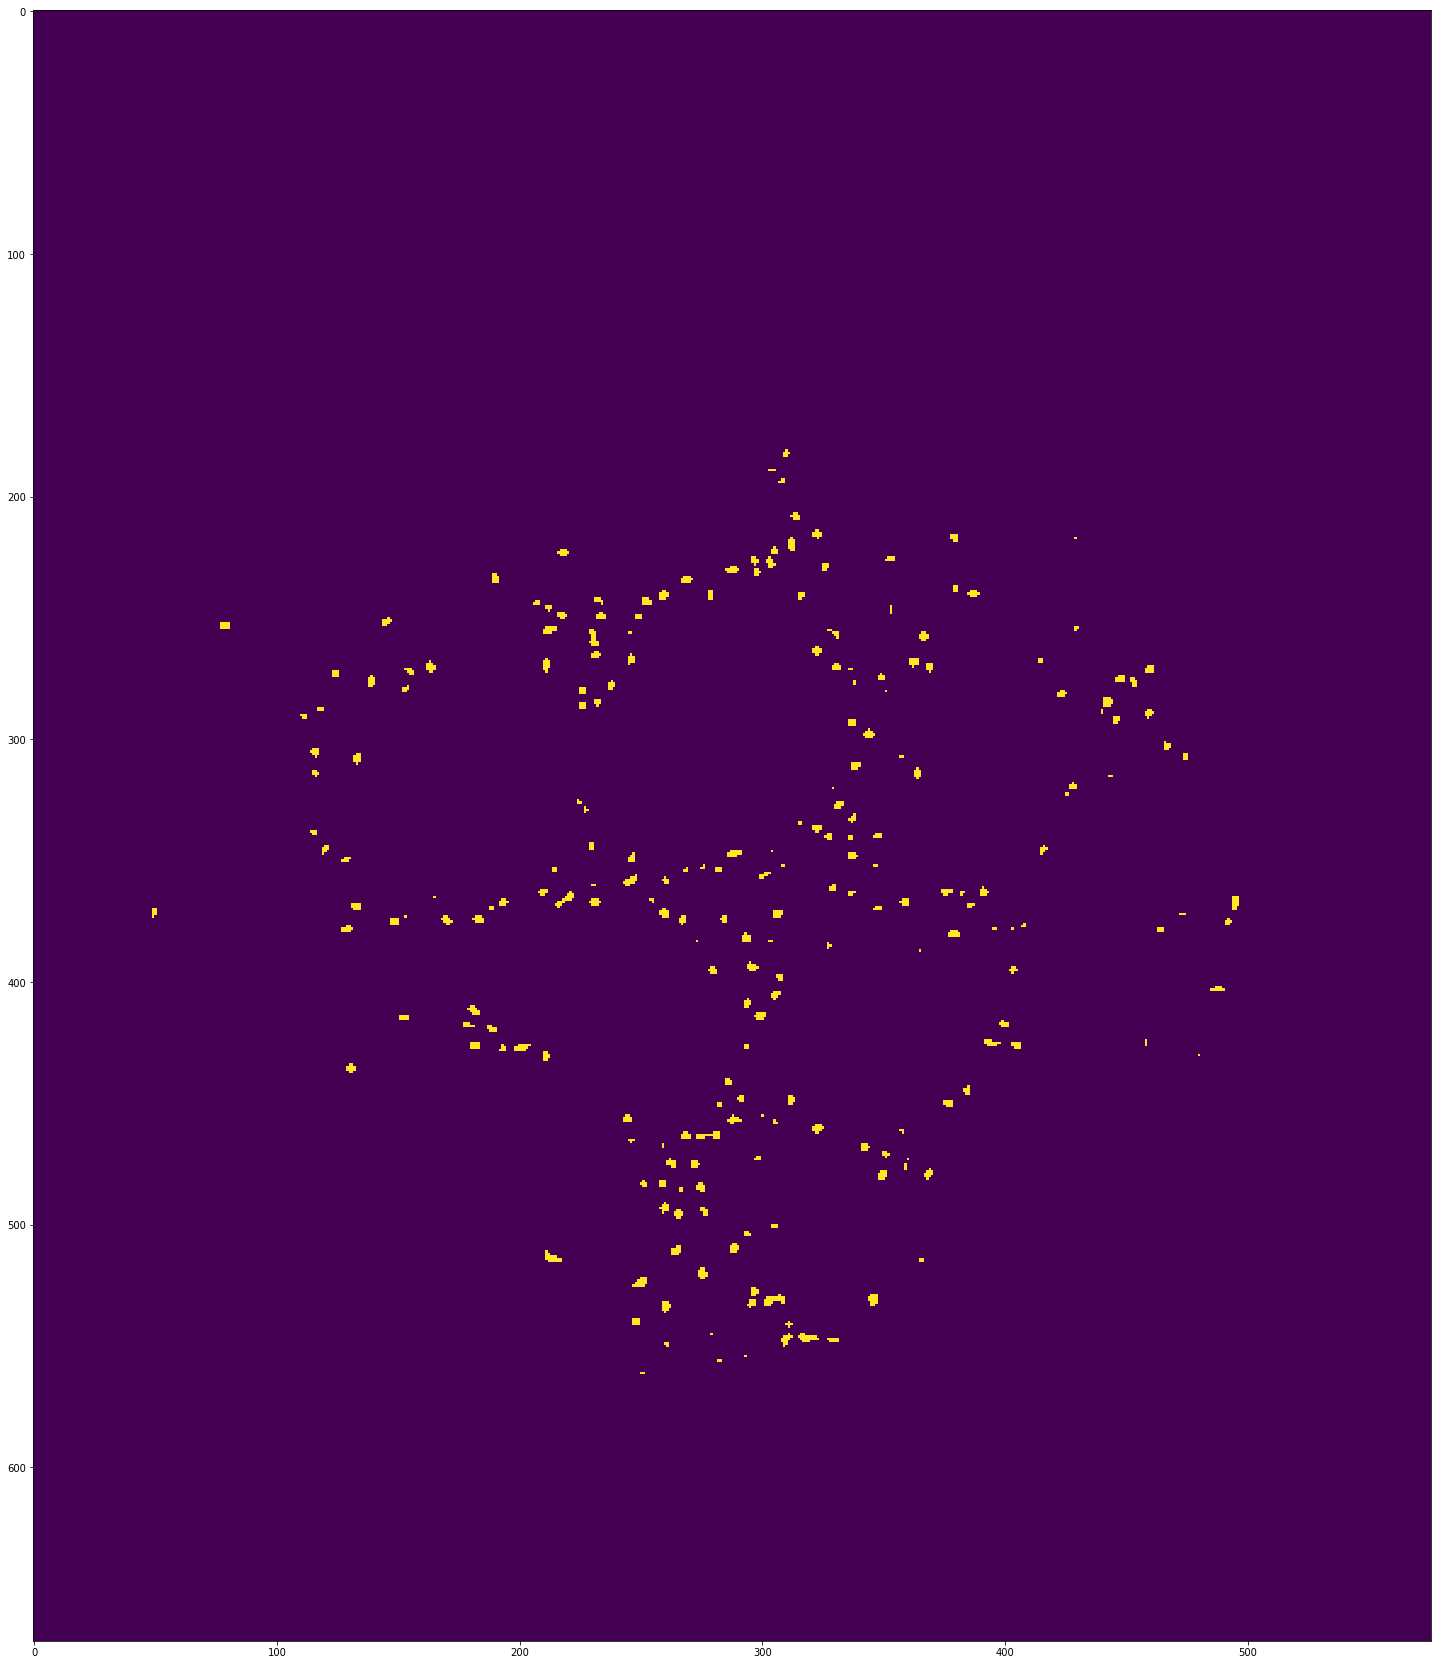

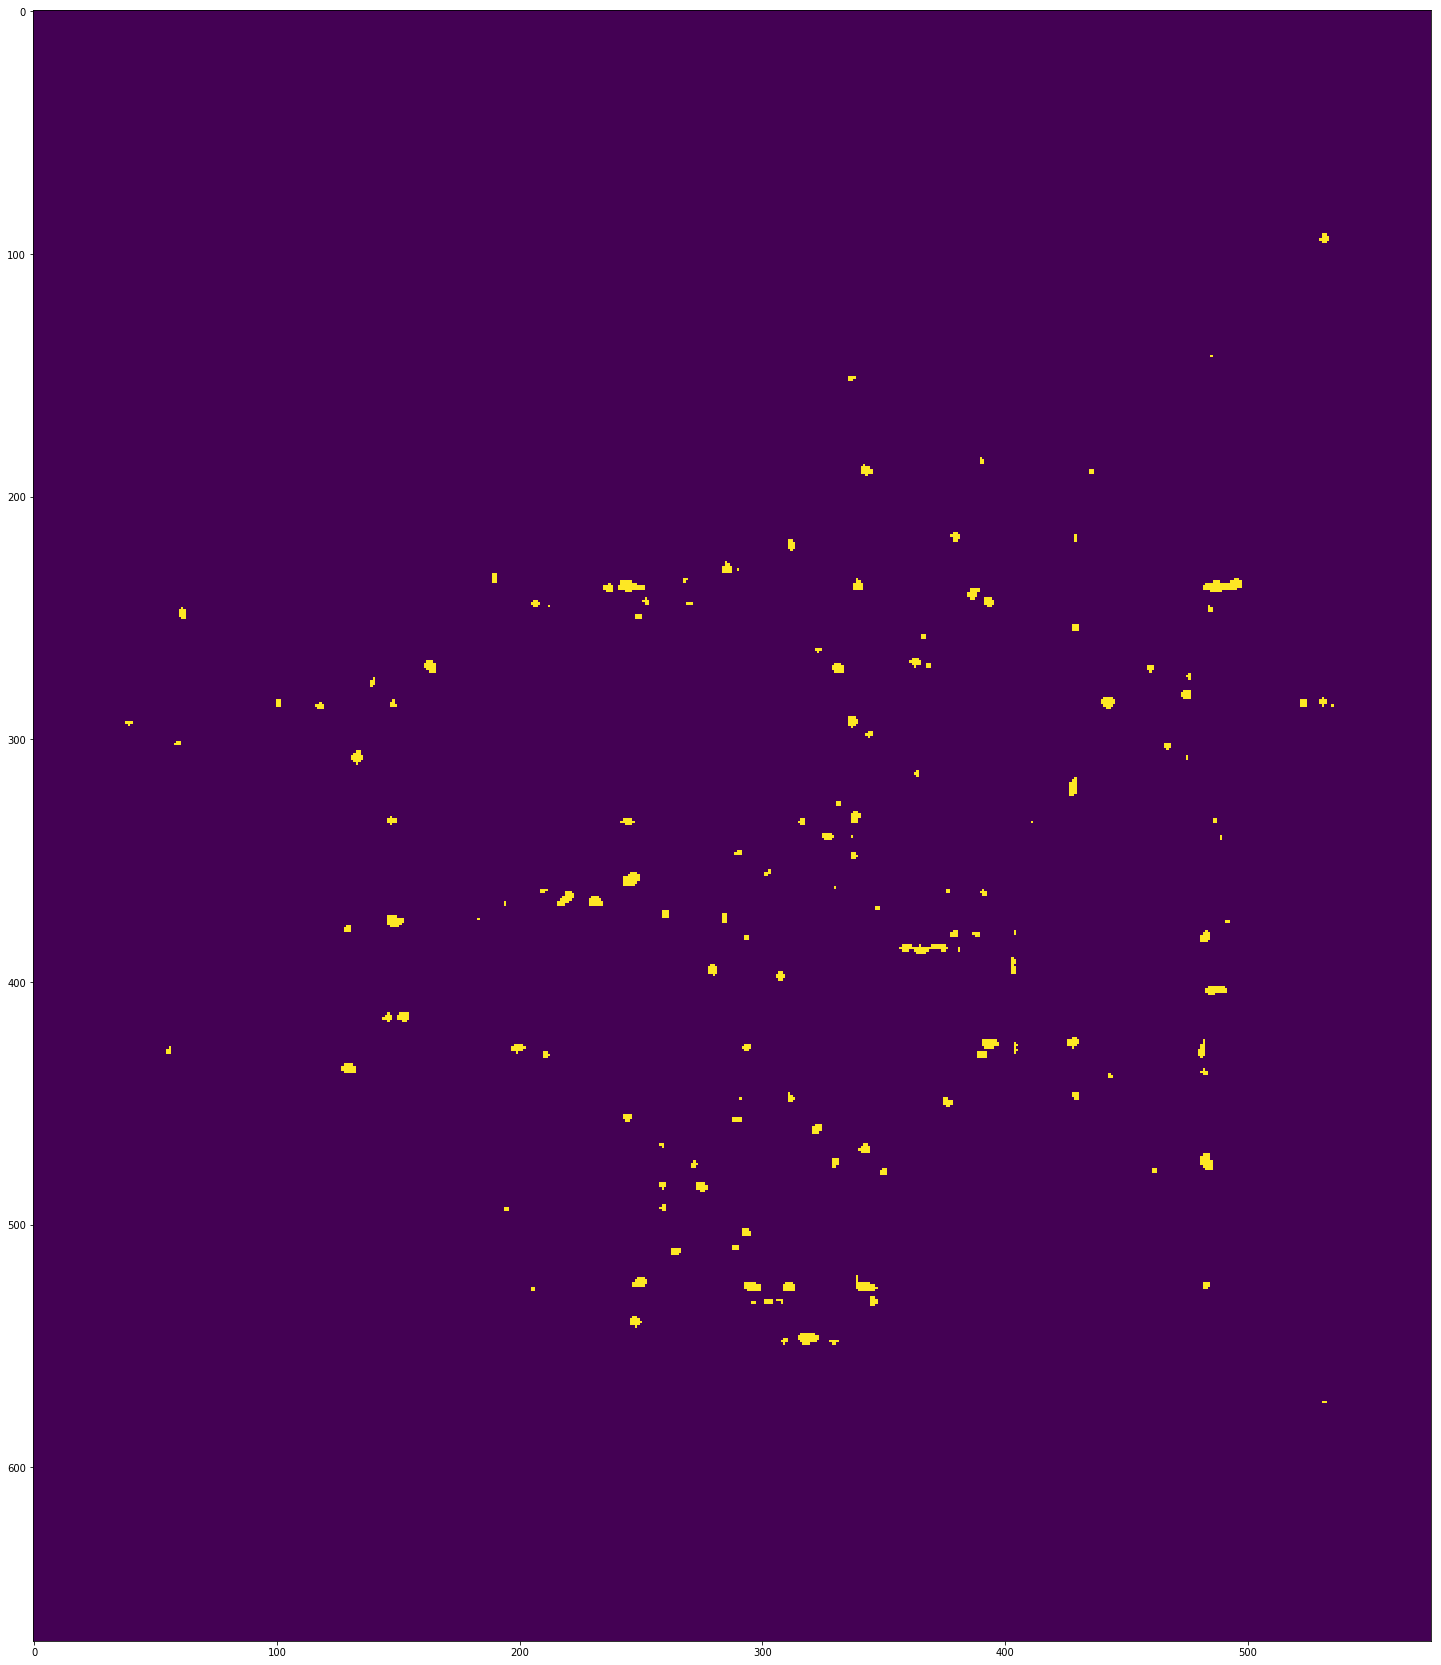

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]

display_slice_from_batch(skimage.external.tifffile.imread(image_path)[:192, :672, :576].reshape(1, 192, 672, 576, 1), z=48)
display_slice_from_batch(skimage.external.tifffile.imread("/home/gauthamar11/pyLattice2/src/tensorflow/quickUnet/dataset/extras/dmask_02.tif")[:192, :672, :576].reshape(1, 192, 672, 576, 1), z=48)
display_slice_from_batch(mask, z=48)
#With jul21_48_nonzero_standardized_global on larger data size

In [3]:
#ONLY RUN FOR CUBE PREDICTIONS
mask = predict_mask(model, image_path, image_size, patch_size)

NameError: name 'model' is not defined

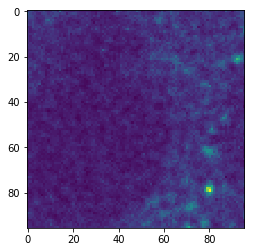

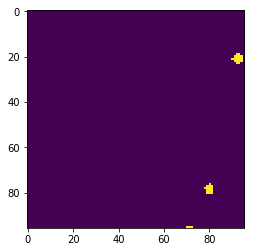

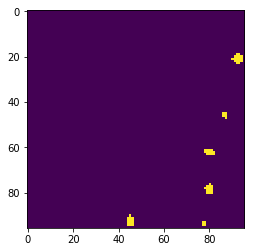

In [5]:
display_slice_from_batch(skimage.external.tifffile.imread(image_path)[:image_size, :image_size, :image_size].reshape(1, 96, 96, 96, 1))
display_slice_from_batch(skimage.external.tifffile.imread("dataset/train/Frame2/truth.tif")[:image_size, :image_size, :image_size].reshape(1, 96, 96, 96, 1))
display_slice_from_batch(mask)
#With jul21_48_nonzero_standardized_global
#Model notes loss: standardized globally

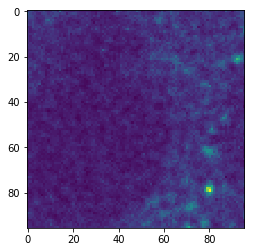

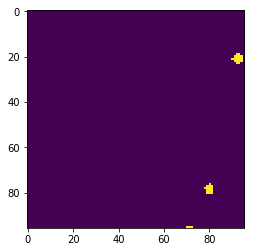

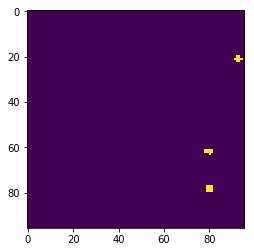

In [16]:
display_slice_from_batch(skimage.external.tifffile.imread(image_path)[:image_size, :image_size, :image_size].reshape(1, 96, 96, 96, 1))
display_slice_from_batch(skimage.external.tifffile.imread("dataset/train/Frame2/truth.tif")[:image_size, :image_size, :image_size].reshape(1, 96, 96, 96, 1))
display_slice_from_batch(mask)
#With jul21_48_nonzero_standardized
#Model notes loss: standardized locally (per patch)
#With frame 2, it looks like intensity plays a big role

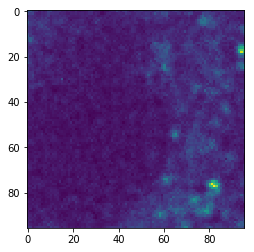

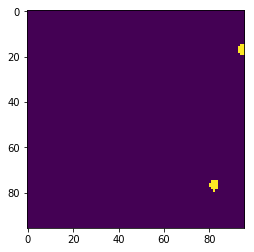

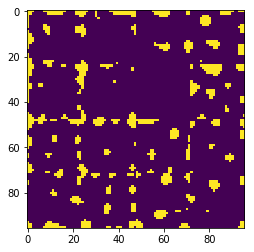

In [12]:
display_slice_from_batch(skimage.external.tifffile.imread(image_path)[:image_size, :image_size, :image_size].reshape(1, 96, 96, 96, 1))
display_slice_from_batch(skimage.external.tifffile.imread("dataset/train/Frame35/truth.tif")[:image_size, :image_size, :image_size].reshape(1, 96, 96, 96, 1))
display_slice_from_batch(mask)
#With jul21_24_all (trained on everything)
#Model notes loss: -0.7611 on one epoch, val_loss = -0.801

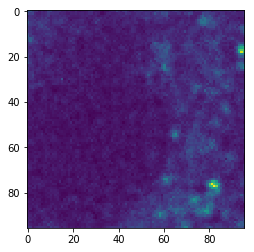

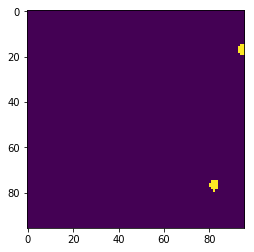

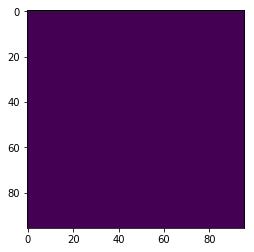

In [7]:
display_slice_from_batch(skimage.external.tifffile.imread(image_path)[:image_size, :image_size, :image_size].reshape(1, 96, 96, 96, 1))
display_slice_from_batch(skimage.external.tifffile.imread("dataset/train/Frame35/truth.tif")[:image_size, :image_size, :image_size].reshape(1, 96, 96, 96, 1))
display_slice_from_batch(mask)
#With jul21_32_all (trained on everything)
#Model notes (loss did not converge, ended at -0.0031, acc 93.23)

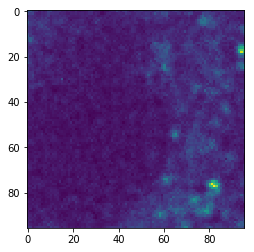

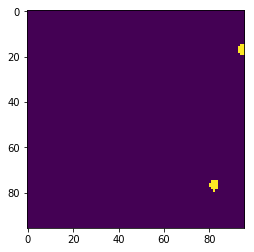

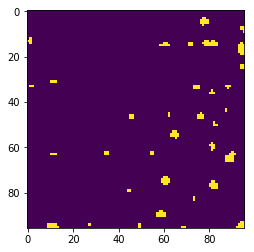

In [51]:
display_slice_from_batch(latticeMovieImage.reshape(1, 96, 96, 96, 1))
display_slice_from_batch(skimage.external.tifffile.imread("dataset/train/Frame35/truth.tif")[:image_size, :image_size, :image_size].reshape(1, 96, 96, 96, 1))
display_slice_from_batch(result)
#With 1200_model (trained on everything) 16 x 16 x 16 patches

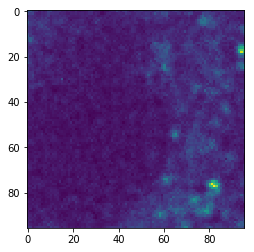

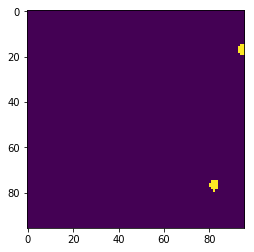

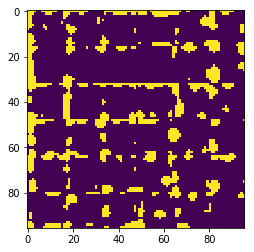

In [46]:
display_slice_from_batch(latticeMovieImage.reshape(1, 96, 96, 96, 1))
display_slice_from_batch(skimage.external.tifffile.imread("dataset/train/Frame35/truth.tif")[:image_size, :image_size, :image_size].reshape(1, 96, 96, 96, 1))
display_slice_from_batch(result)
#With 1150_model (trained on all nonzeroes)

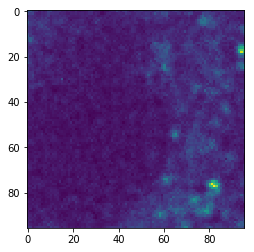

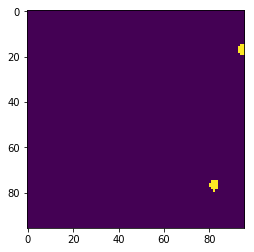

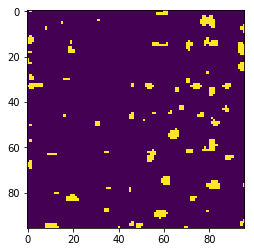

In [33]:
display_slice_from_batch(latticeMovieImage.reshape(1, 96, 96, 96, 1))
display_slice_from_batch(skimage.external.tifffile.imread("dataset/train/Frame35/truth.tif")[:image_size, :image_size, :image_size].reshape(1, 96, 96, 96, 1))
display_slice_from_batch(result)
#With best_model (initial, trained on 5 percent or greater) patch=16